# Análise de Dados - Medicamentos Antimicrobianos

## Objetivo
Compreender a distribuição das vendas de medicamentos antimicrobianos no território brasileiro durante o mês de Novembro de 2021.

# Importando Bibliotecas Necessárias

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
sns.set_theme('notebook')

# Obtendo os Dados
Fonte dos Dados: Os dados utilizados para essa análise estão disponíveis no site de Dados Abertos do Governo Federal. Acesso: <br>
https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados 

# Entendendo o Significado dos Dados

<table border="1">
        <tr>
            <th>Campo</th>
            <th>Descrição</th>
        </tr>
        <tr>
            <td>ANO_VENDA</td>
            <td>Ano da venda do medicamento.</td>
        </tr>
        <tr>
            <td>MES_VENDA</td>
            <td>Mês da venda do medicamento.</td>
        </tr>
        <tr>
            <td>UF_VENDA</td>
            <td>Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, onde ocorreu a venda.</td>
        </tr>
        <tr>
            <td>MUNICIPIO_VENDA</td>
            <td>Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, onde ocorreu a venda.</td>
        </tr>
        <tr>
            <td>PRINCIPIO_ATIVO</td>
            <td>Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa. Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere "+".</td>
        </tr>
        <tr>
            <td>DESCRICAO_APRESENTACAO</td>
            <td>Uma Apresentação de Medicamento representa o modo como um medicamento é apresentado na embalagem. Os termos utilizados na descrição das apresentações seguem o disposto no Vocabulário Controlado da Anvisa.</td>
        </tr>
        <tr>
            <td>QTD_VENDIDA</td>
            <td>Quantidade vendida de caixas ou frascos do medicamento.</td>
        </tr>
        <tr>
            <td>UNIDADE_MEDIDA</td>
            <td>Indica se a quantidade vendida do medicamento foi de caixas ou frascos.</td>
        </tr>
        <tr>
            <td>CONSELHO_PRESCRITOR</td>
            <td>Conselho de Classe do profissional que prescreveu o medicamento vendido.</td>
        </tr>
        <tr>
            <td>UF_CONSELHO_PRESCRITOR</td>
            <td>Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.</td>
        </tr>
        <tr>
            <td>TIPO_RECEITUARIO</td>
            <td>
                Tipo de receituário utilizado na prescrição.<br>
                1 – Receita de Controle Especial em 2 vias (Receita Branca);
                2 – Notificação de Receita B (Notificação Azul);
                3 – Notificação de Receita Especial (Notificação Branca);
                4 – Notificação de Receita A (Notificação Amarela);
                5 – Receita Antimicrobiano em 2 vias.
            </td>
        </tr>
        <tr>
            <td>CID10</td>
            <td>Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).</td>
        </tr>
        <tr>
            <td>SEXO</td>
            <td>Sexo do paciente (aplicável apenas a medicamentos antimicrobianos). Valor 1 para o sexo masculino, valor 2 para o sexo feminino.</td>
        </tr>
        <tr>
            <td>IDADE</td>
            <td>Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).</td>
        </tr>
        <tr>
            <td>UNIDADE_IDADE</td>
            <td>Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos). Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.</td>
        </tr>
</table>

*OBS*: Foi retirado dessa análise as colunas ```ANO_VENDA, MES_VENDA, DESCRICAO_APRESENTACAO```, pois possuem os mesmo dado para todas as linhas que percorrem o dataset. Além disso, a informação conjunta dessas duas colunas nos diz que os dados são do mês Novembro do ano de 2021, informação a qual já é citada no início dessa análise. 

# Visualizando os Dados

In [2]:
caminho_dataset = '/home/yurilima/antimicrobianos_csv/EDA_Industrializados_202111.csv'
dataset_medicamentos = pd.read_csv(caminho_dataset,
                                   sep=';', 
                                   on_bad_lines='skip', 
                                   encoding='latin-1', 
                                  usecols=['UF_VENDA', 
                                           'MUNICIPIO_VENDA', 
                                           'PRINCIPIO_ATIVO', 
                                           'QTD_VENDIDA',
                                           'UNIDADE_MEDIDA', 
                                           'CONSELHO_PRESCRITOR', 
                                           'UF_CONSELHO_PRESCRITOR',
                                           'TIPO_RECEITUARIO', 
                                           'CID10', 
                                           'SEXO', 
                                           'IDADE', 
                                           'UNIDADE_IDADE'])
dataset_medicamentos.head()

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0


# Explorando os Dados
Analisando os campos disponíveis na base de dados.

In [3]:
dataset_medicamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785568 entries, 0 to 2785567
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   UF_VENDA                object 
 1   MUNICIPIO_VENDA         object 
 2   PRINCIPIO_ATIVO         object 
 3   QTD_VENDIDA             int64  
 4   UNIDADE_MEDIDA          object 
 5   CONSELHO_PRESCRITOR     object 
 6   UF_CONSELHO_PRESCRITOR  object 
 7   TIPO_RECEITUARIO        float64
 8   CID10                   object 
 9   SEXO                    float64
 10  IDADE                   float64
 11  UNIDADE_IDADE           float64
dtypes: float64(4), int64(1), object(7)
memory usage: 255.0+ MB


Para iniciar a exploração dos dados vamos separá-los em tipos de dados: 
- Categóricos
    - Nominais
    - Ordinais
- Numéricos
    - Discretos
    - Continuos

## Distribuição Global de Dados Categóricos

In [4]:
def mostrar_frequencias(dataset):
    tamanho = len(dataset)
    print('__________________________RELATÓRIO_GERAL__________________________')
    print(f'__________________________TAMANHO: {tamanho}__________________________')
    
    for coluna in dataset:
        nulos = dataset[coluna].isnull().sum()
        print('__________''FREQUÊNCIA RELATIVA_'+coluna+'___________')
        print(dataset[coluna].value_counts(normalize=True) * 100)
        print('O campo {} apresenta {:.2%} de valores nulos.'.format(coluna, (nulos/tamanho)))

### Nominais

O panorama geral do dados nominais pode ser realizado através de uma breve distribuição de frequência relativa dessas informações e, além disso retornar a quantidade de valores nulos em cada campo dos dados nominais.

In [5]:
dados_nominais = ['UF_VENDA',
                  'MUNICIPIO_VENDA',
                  'PRINCIPIO_ATIVO',
                  'UNIDADE_MEDIDA',
                  'CONSELHO_PRESCRITOR',
                  'TIPO_RECEITUARIO',
                  'CID10', 
                  'SEXO', 
                  'UNIDADE_IDADE']

mapa = {'SEXO': {1.0:'Masculino', 2.0:'Feminino'},
       'UNIDADE_IDADE': {1.0:'Anos', 2.0:'Meses'},
       'TIPO_RECEITUARIO': {1.0: 'Receita Branca', 
                            2.0:'Notificação Azul', 
                            3.0:'Notificação Branca',
                            4.0:'Notificação Amarela',
                            5.0:'Receita Antimicrobiano em 2 vias'}}

for coluna, dicionario in mapa.items():
    dataset_medicamentos[coluna] = dataset_medicamentos[coluna].map(dicionario)

dataset_medicamentos_nominais = dataset_medicamentos[dados_nominais]

mostrar_frequencias(dataset_medicamentos_nominais)

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 2785568__________________________
__________FREQUÊNCIA RELATIVA_UF_VENDA___________
SP    21.030217
MG    14.774545
RS     8.617883
PR     7.908261
RJ     6.663058
GO     5.202422
BA     4.877354
SC     4.669066
PE     3.137888
PB     2.336292
ES     2.245826
MT     2.202531
RN     2.183971
CE     2.095407
PA     1.826486
MA     1.576160
MS     1.364354
DF     1.193222
SE     1.057415
RO     0.963430
AL     0.869553
TO     0.812689
PI     0.736331
AM     0.694401
AC     0.451901
RR     0.256931
AP     0.252408
Name: UF_VENDA, dtype: float64
O campo UF_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_MUNICIPIO_VENDA___________
SÃO PAULO              2.327461
RIO DE JANEIRO         1.386611
CURITIBA               1.210274
GOIÂNIA                0.816386
SALVADOR               0.766307
                         ...   
MACIEIRA               0.000036
SANTA ROSA DA SERR

### Numéricos

In [6]:
dados_numericos = ['IDADE', 'QTD_VENDIDA']

dataset_medicamentos_numericos = dataset_medicamentos[dados_numericos]

mostrar_frequencias(dataset_medicamentos_numericos)

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 2785568__________________________
__________FREQUÊNCIA RELATIVA_IDADE___________
30.0     2.482398
35.0     2.464801
45.0     2.391507
36.0     2.293018
25.0     2.286146
           ...   
956.0    0.000056
535.0    0.000056
241.0    0.000056
754.0    0.000056
610.0    0.000056
Name: IDADE, Length: 729, dtype: float64
O campo IDADE apresenta 35.74% de valores nulos.
__________FREQUÊNCIA RELATIVA_QTD_VENDIDA___________
1      53.285793
2      20.985523
3       8.527309
4       4.697103
5       2.315542
         ...    
587     0.000036
607     0.000036
797     0.000036
321     0.000036
555     0.000036
Name: QTD_VENDIDA, Length: 914, dtype: float64
O campo QTD_VENDIDA apresenta 0.00% de valores nulos.


# Perguntas Feitas a Partir do Relatório Geral dos Dados

Para fins de permitir que esse relatório tenha objetivos de exploração, foi decidido que esses dados vão análisados da perspectiva das unidades federativas que compoẽm o *nordeste* do país. E as perguntas que podem ser feitas a partir desse dados são:
- Qual o estado do nordeste que teve mais vendas no período de Novembro de 2021?
- Quais os dez medicamentos mais vendidos do nordeste?
- Qual o medicamento mais vendido em cada estado?
- Qual o municípios em cada estado do nordeste que teve mais vendas?
- Quais os CID10 mais presentes em cada estado?
- Na distribuição de idades, podemos achar recem-nascidos? Se sim, quais são os medicamentos mais vendidos para essa faixa de idade. 
- Quais os Conselhos Regionais de Medicina que mais liberaram receitas?
- Quais os tipos de receitas mais presentes em cada estado?
- No nordeste, foi prescrito medicamentos mais para homens ou para mulheres?

### Filtrando a base de dados focando no Nordeste

In [7]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
nordeste = dataset_medicamentos.loc[dataset_medicamentos['UF_VENDA'].isin(estados_nordeste),:]

nordeste.head()

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
248,BA,MEDEIROS NETO,DEXAMETASONA + SULFATO DE NEOMICINA + SULFATO ...,1,CAIXA,CRM,BA,Receita Antimicrobiano em 2 vias,NaN,Feminino,45.0,Anos
249,BA,MEDEIROS NETO,DEXAMETASONA + SULFATO DE NEOMICINA + SULFATO ...,1,FRASCO,CRM,BA,Receita Antimicrobiano em 2 vias,NaN,Masculino,36.0,Anos
250,BA,MEDEIROS NETO,DIAZEPAM,1,CAIXA,CRM,BA,Notificação Azul,NaN,NaN,NaN,NaN
251,BA,MEDEIROS NETO,DIPROPIONATO DE BETAMETASONA + SULFATO DE GENT...,1,CAIXA,CRM,BA,Receita Antimicrobiano em 2 vias,NaN,Masculino,6.0,Anos
252,BA,MEDEIROS NETO,DIPROPIONATO DE BETAMETASONA + SULFATO DE GENT...,1,CAIXA,CRM,BA,Receita Antimicrobiano em 2 vias,NaN,Masculino,23.0,Anos


Analisando as características do filtro para o Nordeste, podemos perceber que temos 525647 linhas e 12 colunas como suas dimensões, representando aproximadamente 18,9% de todos os dados. O próximo passo é fazer o tratamento dos dados nulos e em seguida visualizar os dados e extrair insights da presente base de dados a partir das perguntas feitas para esse projeto. 

In [8]:
porcentagem_dados_nordeste = nordeste.shape[0]/dataset_medicamentos.shape[0]
print('A parcela de dados representada pelo nordeste é de {:.2%}'.format(porcentagem_dados_nordeste))

A parcela de dados representada pelo nordeste é de 18.87%


Contudo, a um detalhe interessante nos dados no que diz respeito ao unidade de idade que nos traz a informação que algumas idades são medidade em anos e outras em meses, o que leva a crer que os remédios estão sendo prescritos para recém-nascidos, crianças e adolescentes. Por essa razão o conjunto de dados filtrados para a região do nordeste sofrerá uma divisão pelos valores de unidade a qual a idade é mensurada.
- Igual a ```Anos``` > Adultos
- Igual a ```Meses```> Jovens (recém-nascidos, crianças e adolescentes)

# Dividindo a Base de Dados A partir da Unidade

In [9]:
jovens = nordeste.query('UNIDADE_IDADE == "Meses"')
mostrar_frequencias(jovens)

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 6018__________________________
__________FREQUÊNCIA RELATIVA_UF_VENDA___________
PE    24.592888
BA    21.169824
CE    14.772350
MA    11.232968
RN    10.584912
PB     7.660352
SE     5.516783
AL     2.259887
PI     2.210037
Name: UF_VENDA, dtype: float64
O campo UF_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_MUNICIPIO_VENDA___________
SALVADOR                 7.726820
FORTALEZA                7.045530
SÃO LUÍS                 6.763044
RECIFE                   3.755400
NATAL                    3.456298
                           ...   
LAJE                     0.016617
LAGOA SALGADA            0.016617
LUCRÉCIA                 0.016617
SANTA CRUZ DA VITÓRIA    0.016617
LAGOA DO OURO            0.016617
Name: MUNICIPIO_VENDA, Length: 572, dtype: float64
O campo MUNICIPIO_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_PRINCIPIO_ATIVO_____

In [10]:
adultos = nordeste.query('UNIDADE_IDADE == "Anos"')
mostrar_frequencias(adultos)

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 301184__________________________
__________FREQUÊNCIA RELATIVA_UF_VENDA___________
BA    26.592382
PE    16.660248
RN    12.891455
PB    12.230729
CE     9.703703
MA     7.814160
SE     6.058091
AL     4.586897
PI     3.462335
Name: UF_VENDA, dtype: float64
O campo UF_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_MUNICIPIO_VENDA___________
SALVADOR         5.968113
FORTALEZA        4.726679
RECIFE           3.708696
NATAL            3.599129
JOÃO PESSOA      3.316909
                   ...   
BAIANÓPOLIS      0.000332
PIRAPEMAS        0.000332
COITÉ DO NÓIA    0.000332
GUARATINGA       0.000332
PERI MIRIM       0.000332
Name: MUNICIPIO_VENDA, Length: 1190, dtype: float64
O campo MUNICIPIO_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_PRINCIPIO_ATIVO___________
AZITROMICINA DI-HIDRATADA                                     8.627197
AMOXICI

### Analisando Variáveis Categóricas e Numéricas do Nordeste

In [11]:
#Nominais
mostrar_frequencias(adultos[dados_nominais])

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 301184__________________________
__________FREQUÊNCIA RELATIVA_UF_VENDA___________
BA    26.592382
PE    16.660248
RN    12.891455
PB    12.230729
CE     9.703703
MA     7.814160
SE     6.058091
AL     4.586897
PI     3.462335
Name: UF_VENDA, dtype: float64
O campo UF_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_MUNICIPIO_VENDA___________
SALVADOR         5.968113
FORTALEZA        4.726679
RECIFE           3.708696
NATAL            3.599129
JOÃO PESSOA      3.316909
                   ...   
BAIANÓPOLIS      0.000332
PIRAPEMAS        0.000332
COITÉ DO NÓIA    0.000332
GUARATINGA       0.000332
PERI MIRIM       0.000332
Name: MUNICIPIO_VENDA, Length: 1190, dtype: float64
O campo MUNICIPIO_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_PRINCIPIO_ATIVO___________
AZITROMICINA DI-HIDRATADA                                     8.627197
AMOXICI

In [12]:
#Numéricos
mostrar_frequencias(adultos[dados_numericos])

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 301184__________________________
__________FREQUÊNCIA RELATIVA_IDADE___________
35.0     2.656184
25.0     2.654856
36.0     2.628294
30.0     2.507769
45.0     2.339434
           ...   
856.0    0.000332
992.0    0.000332
743.0    0.000332
719.0    0.000332
107.0    0.000332
Name: IDADE, Length: 320, dtype: float64
O campo IDADE apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_QTD_VENDIDA___________
1        65.827534
2        20.305528
3         7.293880
4         2.968285
6         1.088703
           ...    
49        0.000332
44        0.000332
60        0.000332
90        0.000332
13192     0.000332
Name: QTD_VENDIDA, Length: 64, dtype: float64
O campo QTD_VENDIDA apresenta 0.00% de valores nulos.


## Jovens

In [13]:
#Nominais
mostrar_frequencias(jovens[dados_nominais])

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 6018__________________________
__________FREQUÊNCIA RELATIVA_UF_VENDA___________
PE    24.592888
BA    21.169824
CE    14.772350
MA    11.232968
RN    10.584912
PB     7.660352
SE     5.516783
AL     2.259887
PI     2.210037
Name: UF_VENDA, dtype: float64
O campo UF_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_MUNICIPIO_VENDA___________
SALVADOR                 7.726820
FORTALEZA                7.045530
SÃO LUÍS                 6.763044
RECIFE                   3.755400
NATAL                    3.456298
                           ...   
LAJE                     0.016617
LAGOA SALGADA            0.016617
LUCRÉCIA                 0.016617
SANTA CRUZ DA VITÓRIA    0.016617
LAGOA DO OURO            0.016617
Name: MUNICIPIO_VENDA, Length: 572, dtype: float64
O campo MUNICIPIO_VENDA apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_PRINCIPIO_ATIVO_____

In [14]:
#Numéricos
mostrar_frequencias(jovens[dados_numericos])

__________________________RELATÓRIO_GERAL__________________________
__________________________TAMANHO: 6018__________________________
__________FREQUÊNCIA RELATIVA_IDADE___________
1.0     11.980724
10.0     5.417082
6.0      5.300764
11.0     5.284148
7.0      5.217680
          ...    
91.0     0.033234
94.0     0.016617
98.0     0.016617
96.0     0.016617
92.0     0.016617
Name: IDADE, Length: 99, dtype: float64
O campo IDADE apresenta 0.00% de valores nulos.
__________FREQUÊNCIA RELATIVA_QTD_VENDIDA___________
1     75.772682
2     15.719508
3      4.702559
4      1.561981
6      0.631439
5      0.598205
8      0.216019
7      0.166168
9      0.149551
10     0.083084
21     0.066467
17     0.049850
13     0.049850
11     0.049850
12     0.033234
14     0.033234
28     0.016617
19     0.016617
29     0.016617
18     0.016617
24     0.016617
26     0.016617
16     0.016617
Name: QTD_VENDIDA, dtype: float64
O campo QTD_VENDIDA apresenta 0.00% de valores nulos.


# Tratando os dados
Analisando os resultados da última etapa que demonstrava a frequencia relativa dos valores dos dados de cada campo foi notado que é possível que aja valores que não condizem com a realidade. Por esse motivo, Nessa seção irei fazer o tratamento de dados nulos e descrepantes para que possamos visualizar os dados de forma limpa. 

## Adultos

In [15]:
adultos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301184 entries, 248 to 2785440
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UF_VENDA                301184 non-null  object 
 1   MUNICIPIO_VENDA         301184 non-null  object 
 2   PRINCIPIO_ATIVO         299912 non-null  object 
 3   QTD_VENDIDA             301184 non-null  int64  
 4   UNIDADE_MEDIDA          301184 non-null  object 
 5   CONSELHO_PRESCRITOR     301184 non-null  object 
 6   UF_CONSELHO_PRESCRITOR  301184 non-null  object 
 7   TIPO_RECEITUARIO        301184 non-null  object 
 8   CID10                   307 non-null     object 
 9   SEXO                    301184 non-null  object 
 10  IDADE                   301184 non-null  float64
 11  UNIDADE_IDADE           301184 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 29.9+ MB


É notavel que nos campos da base de dados existem apenas duas caracteristicas que possuem valores nulos que são: ```CID10``` e ```PRINCIPIO_ATIVO```. Contudo, o tratamento da base de dados filtrada para os adultos do nordeste vai apenas retirar as linhas que não possuem ```PRINCIPIO_ATIVO```, pois não adianta saber as outras caracterista do medicamento sem saber a qual substância ele está vinculado. E o motivo para o ```CID10``` permanecer na análise é que a informação que ele carrega é importante para saber qual tipo de doença está vinculado ao medicamento, podendo gerar insights de quais doenças os adultos mais estava sendo acometidos no périodo de novembro de 2021 e por esse motivo vamos trocar o valor de nulo para 'Não possui'

In [16]:
adultos.dropna(subset=['PRINCIPIO_ATIVO'], inplace=True)
adultos.info()

/tmp/ipykernel_9732/2094586259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adultos.dropna(subset=['PRINCIPIO_ATIVO'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299912 entries, 248 to 2785440
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UF_VENDA                299912 non-null  object 
 1   MUNICIPIO_VENDA         299912 non-null  object 
 2   PRINCIPIO_ATIVO         299912 non-null  object 
 3   QTD_VENDIDA             299912 non-null  int64  
 4   UNIDADE_MEDIDA          299912 non-null  object 
 5   CONSELHO_PRESCRITOR     299912 non-null  object 
 6   UF_CONSELHO_PRESCRITOR  299912 non-null  object 
 7   TIPO_RECEITUARIO        299912 non-null  object 
 8   CID10                   306 non-null     object 
 9   SEXO                    299912 non-null  object 
 10  IDADE                   299912 non-null  float64
 11  UNIDADE_IDADE           299912 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 29.7+ MB


Outro tratamento que deve ser realizado é na campo de ```IDADE```, pois aparentemente quando analisada a frequencia relativa de idade medida em anos, podemos ver idades que não condizem com a realidade humana e esses dados devem ser tratados, mas antes, vamos checar esse frequencia graficamente. 

[Text(0.5, 1.0, 'Distribuição BoxPlot de Idades'),
 Text(0, 0.5, 'IDADES em Anos')]

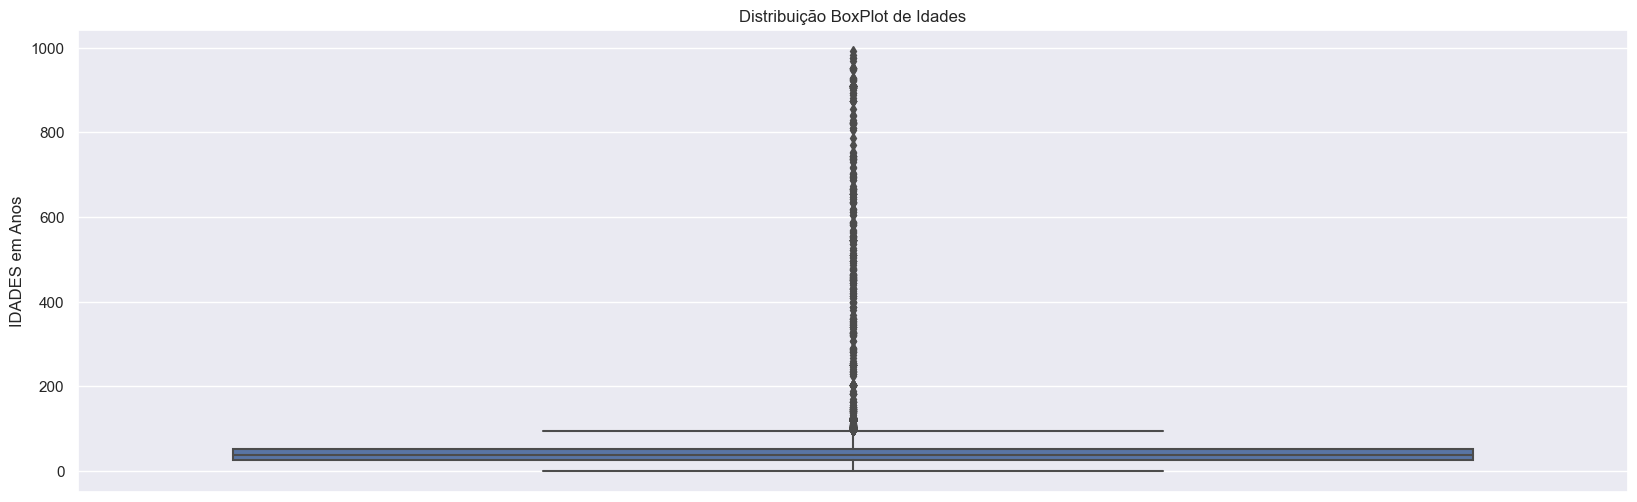

In [17]:
fig, ax = plt.subplots(figsize=(20,6))

adultos_idade_plot = sns.boxplot(y=adultos['IDADE'])

adultos_idade_plot.set(title='Distribuição BoxPlot de Idades', ylabel='IDADES em Anos')

In [18]:
query_idades = adultos.query("IDADE <= 100").index
adultos_atualizado = adultos.loc[query_idades,:]

[Text(0.5, 1.0, 'Distribuição BoxPlot de Idades sem Outliers'),
 Text(0, 0.5, 'IDADES em Anos')]

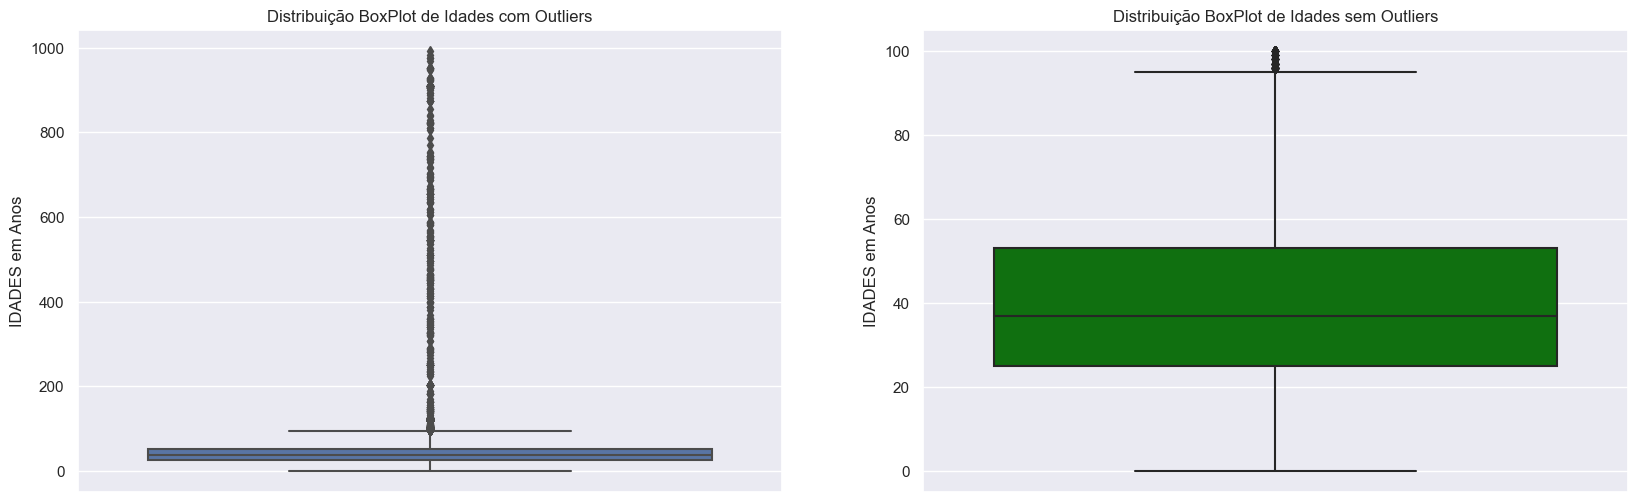

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

sns.boxplot(y=adultos['IDADE'], ax=ax[0])
sns.boxplot(y=adultos_atualizado['IDADE'], ax=ax[1], color='green')

ax[0].set(title='Distribuição BoxPlot de Idades com Outliers', ylabel='IDADES em Anos')
ax[1].set(title='Distribuição BoxPlot de Idades sem Outliers', ylabel='IDADES em Anos')

De fato, existem idade nessa distribuição que não condizem com a realidade da expectativa de vida humana, o que consiste em um erro nos dados, o qual deve ser removido.

In [20]:
adultos_atualizado['CID10'] = adultos_atualizado['CID10'].apply(lambda x: 'Não possui' if pd.isna(x) else x)

Dados nulos de CID10 foi modificado para valor de 'Não possui'

In [21]:
adultos_atualizado

,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
248,BA,MEDEIROS NETO,DEXAMETASONA + SULFATO DE NEOMICINA + SULFATO ...,1,CAIXA,CRM,BA,Receita Antimicrobiano em 2 vias,Não possui,Feminino,45.0,Anos
249,BA,MEDEIROS NETO,DEXAMETASONA + SULFATO DE NEOMICINA + SULFATO ...,1,FRASCO,CRM,BA,Receita Antimicrobiano em 2 vias,Não possui,Masculino,36.0,Anos
251,BA,MEDEIROS NETO,DIPROPIONATO DE BETAMETASONA + SULFATO DE GENT...,1,CAIXA,CRM,BA,Receita Antimicrobiano em 2 vias,Não possui,Masculino,6.0,Anos
252,BA,MEDEIROS NETO,DIPROPIONATO DE BETAMETASONA + SULFATO DE GENT...,1,CAIXA,CRM,BA,Receita Antimicrobiano em 2 vias,Não possui,Masculino,23.0,Anos
253,BA,MEDEIROS NETO,DIPROPIONATO DE BETAMETASONA + SULFATO DE GENT...,1,CAIXA,CRM,BA,Receita Antimicrobiano em 2 vias,Não possui,Masculino,42.0,Anos
...,...,...,...,...,...,...,...,...,...,...,...,...
2785435,MA,ESTREITO,CLORANFENICOL + DESOXIRRIBONUCLEASE + FIBRINOL...,1,CAIXA,CRM,MA,Receita Antimicrobiano em 2 vias,Não possui,Masculino,28.0,Anos
2785436,MA,ESTREITO,CLORANFENICOL + DESOXIRRIBONUCLEASE + FIBRINOL...,2,CAIXA,CRM,TO,Receita Antimicrobiano em 2 vias,Não possui,Masculino,32.0,Anos
2785438,MA,ESTREITO,CLORFENESINA + CLORIDRATO DE TETRACAÍNA + VALE...,1,CAIXA,CRM,MA,Receita Antimicrobiano em 2 vias,Não possui,Masculino,22.0,Anos
2785439,MA,ESTREITO,CLORFENESINA + CLORIDRATO DE TETRACAÍNA + VALE...,1,CAIXA,CRM,MA,Receita Antimicrobiano em 2 vias,Não possui,Masculino,7.0,Anos


## Jovens

In [22]:
jovens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 1247 to 2784657
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF_VENDA                6018 non-null   object 
 1   MUNICIPIO_VENDA         6018 non-null   object 
 2   PRINCIPIO_ATIVO         5968 non-null   object 
 3   QTD_VENDIDA             6018 non-null   int64  
 4   UNIDADE_MEDIDA          6018 non-null   object 
 5   CONSELHO_PRESCRITOR     6018 non-null   object 
 6   UF_CONSELHO_PRESCRITOR  6018 non-null   object 
 7   TIPO_RECEITUARIO        6018 non-null   object 
 8   CID10                   5 non-null      object 
 9   SEXO                    6018 non-null   object 
 10  IDADE                   6018 non-null   float64
 11  UNIDADE_IDADE           6018 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 611.2+ KB


Como podemos observar nesse breve conjunto de informações do conjunto de dados referentes aos jovens, podemos fazer o mesmo tratamento que foi feito para o de adultos. Removendo as linhas que possuem as células referente aos princípios ativos com valores igual a nulo. 

In [23]:
jovens.dropna(subset=['PRINCIPIO_ATIVO'], inplace=True)
jovens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968 entries, 1247 to 2784657
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF_VENDA                5968 non-null   object 
 1   MUNICIPIO_VENDA         5968 non-null   object 
 2   PRINCIPIO_ATIVO         5968 non-null   object 
 3   QTD_VENDIDA             5968 non-null   int64  
 4   UNIDADE_MEDIDA          5968 non-null   object 
 5   CONSELHO_PRESCRITOR     5968 non-null   object 
 6   UF_CONSELHO_PRESCRITOR  5968 non-null   object 
 7   TIPO_RECEITUARIO        5968 non-null   object 
 8   CID10                   5 non-null      object 
 9   SEXO                    5968 non-null   object 
 10  IDADE                   5968 non-null   float64
 11  UNIDADE_IDADE           5968 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 606.1+ KB


/tmp/ipykernel_9732/2377834656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jovens.dropna(subset=['PRINCIPIO_ATIVO'], inplace=True)


### Analisando a distribuição de Idade dos Jovens

[Text(0.5, 1.0, 'Distribuição BoxPlot de Idades'),
 Text(0, 0.5, 'IDADES em Meses')]

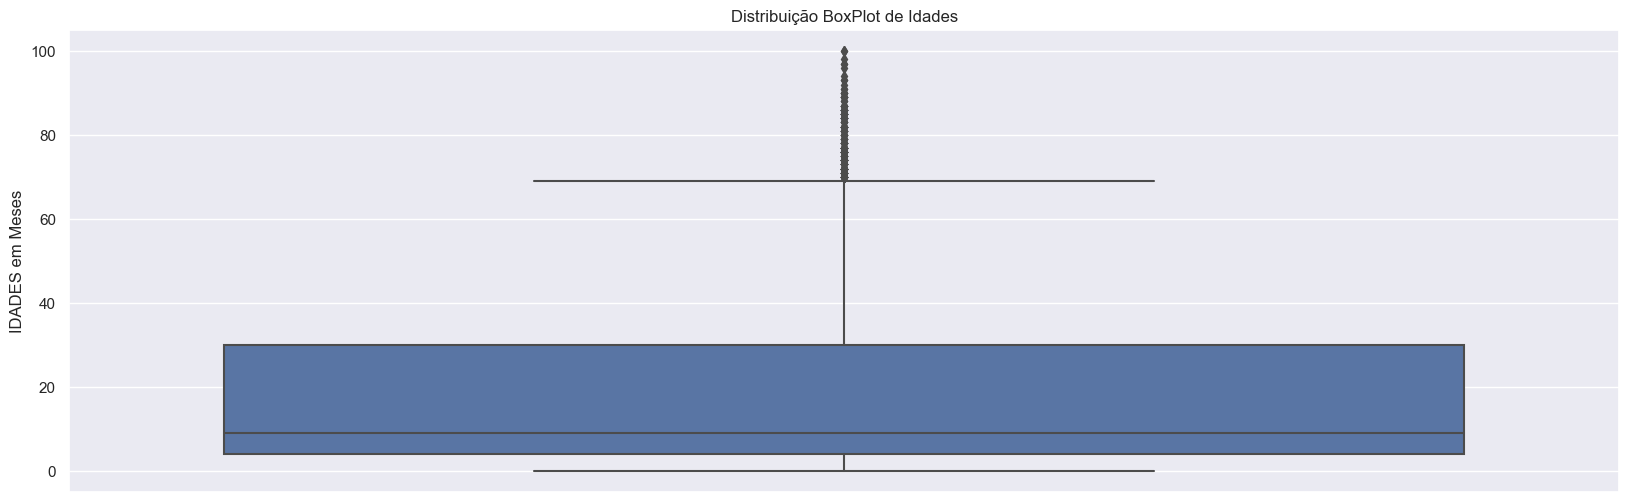

In [24]:
fig, ax = plt.subplots(figsize=(20,6))

jovens_idade_plot = sns.boxplot(y=jovens['IDADE'])

jovens_idade_plot.set(title='Distribuição BoxPlot de Idades', ylabel='IDADES em Meses')

O tratamento quanto a idade não será necessário, pois a faixa de idade calculada para meses de acordo com a distrubuição apresentada no boxplot representa apenas recém-nascidos e crianças.

# Análise gráfica e Respondendo Aos questionamentos

# Adultos

Qual o estado do nordeste que teve mais vendas no período de Novembro de 2021?

In [25]:
adultos_atualizado['UF_VENDA'].value_counts().index[0]

'BA'

Quais os dez medicamentos mais vendidos do nordeste?

[Text(0.5, 1.0, 'Medicamentos mais Vendidos Entre Adultos - Nov/21'),
 Text(0, 0.5, 'Medicamentos')]

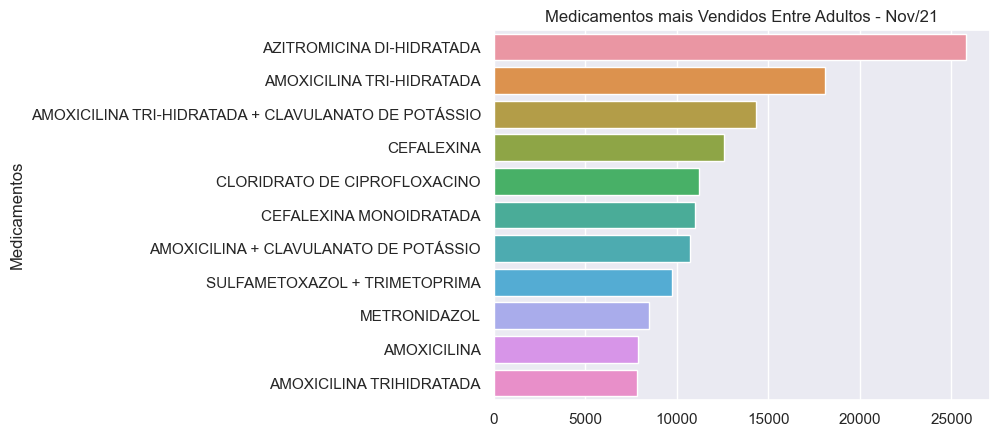

In [26]:
top_dez_med_adulto = sns.barplot(x=adultos_atualizado['PRINCIPIO_ATIVO'].value_counts().values[0:11],
                                 y=adultos_atualizado['PRINCIPIO_ATIVO'].value_counts().index[0:11],
                                orient='h')
top_dez_med_adulto.set(title='Medicamentos mais Vendidos Entre Adultos - Nov/21', 
                       ylabel='Medicamentos')

Qual o medicamento mais vendido em cada estado?

In [27]:
for estado in adultos_atualizado['UF_VENDA'].value_counts().index:
    medicamento = adultos_atualizado.query(f'UF_VENDA == "{estado}"')['PRINCIPIO_ATIVO']
    print(estado, medicamento.value_counts().index[0],medicamento.value_counts().max(),  sep=' | ')

BA | AZITROMICINA DI-HIDRATADA | 6528
PE | AZITROMICINA DI-HIDRATADA | 3444
RN | AZITROMICINA DI-HIDRATADA | 4305
PB | AZITROMICINA DI-HIDRATADA | 3328
CE | AZITROMICINA DI-HIDRATADA | 2578
MA | AZITROMICINA DI-HIDRATADA | 2198
SE | AZITROMICINA DI-HIDRATADA | 1541
AL | AZITROMICINA DI-HIDRATADA | 1162
PI | AZITROMICINA DI-HIDRATADA | 730


Quais os municípios em cada estado do nordeste que teve mais vendas?

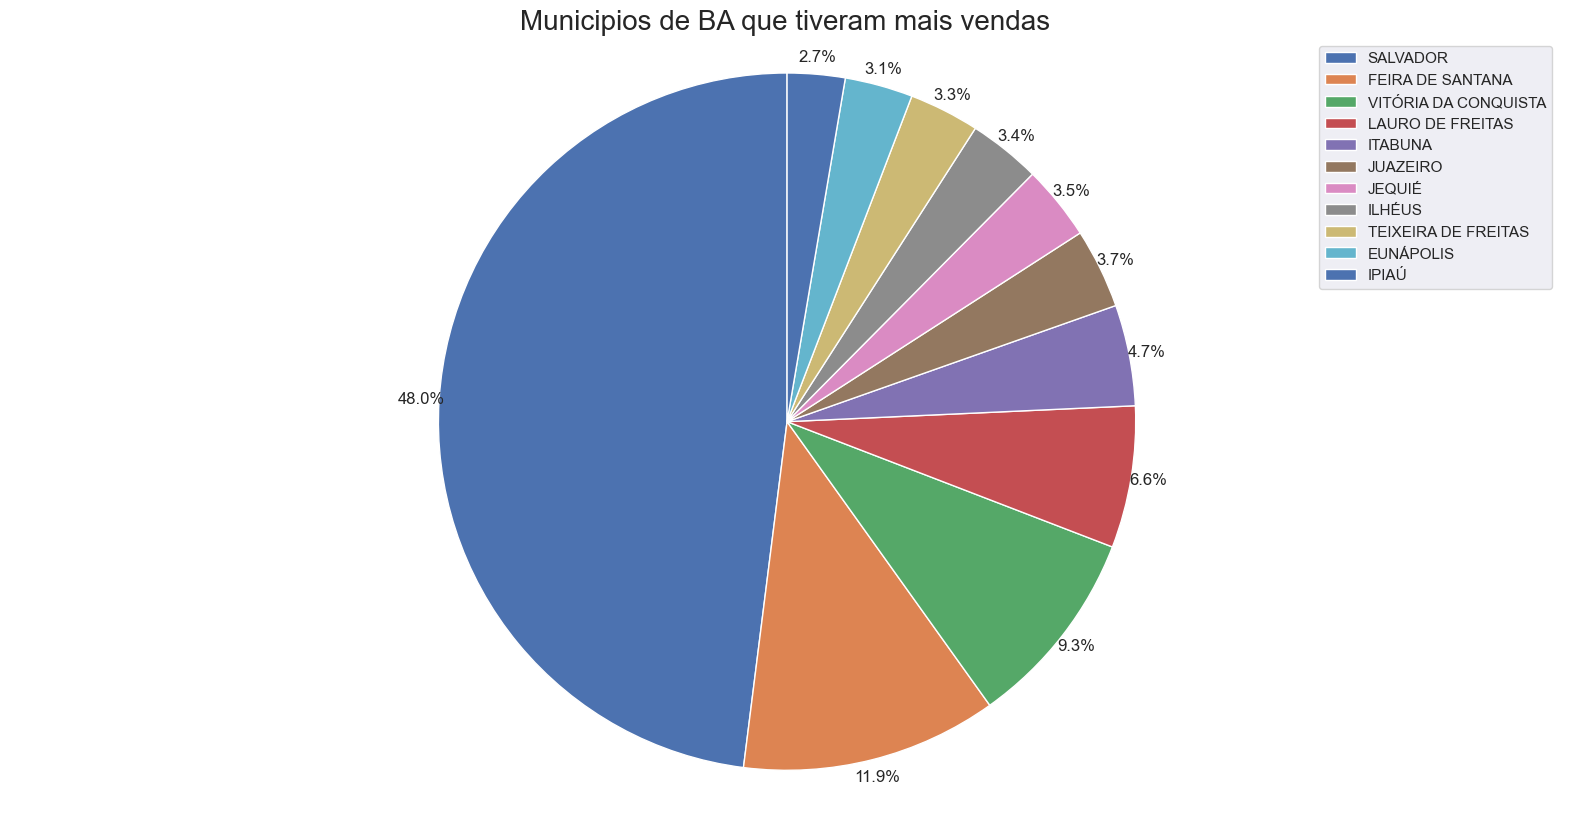

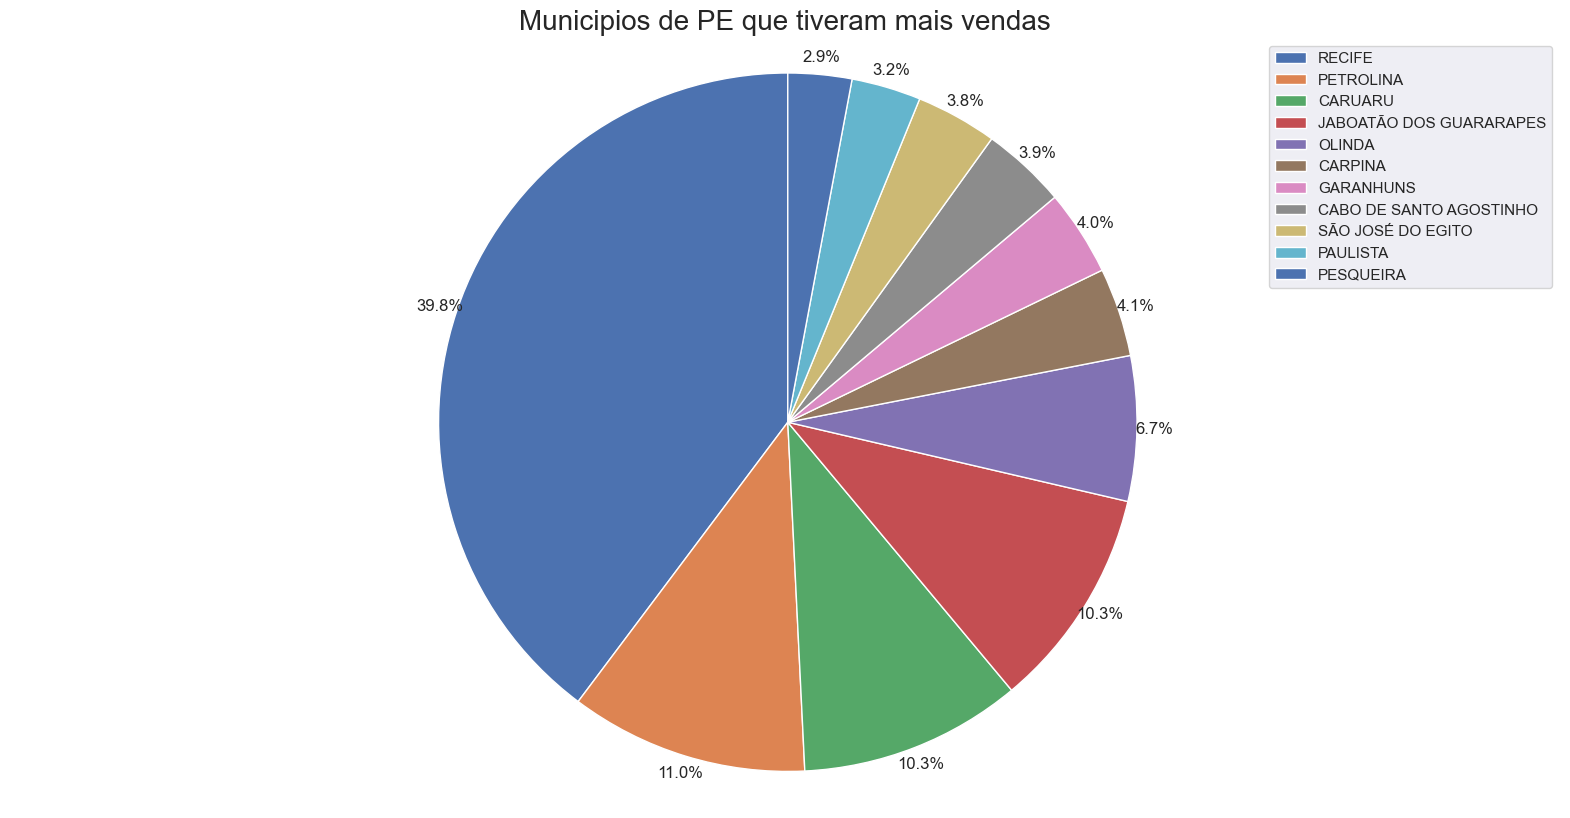

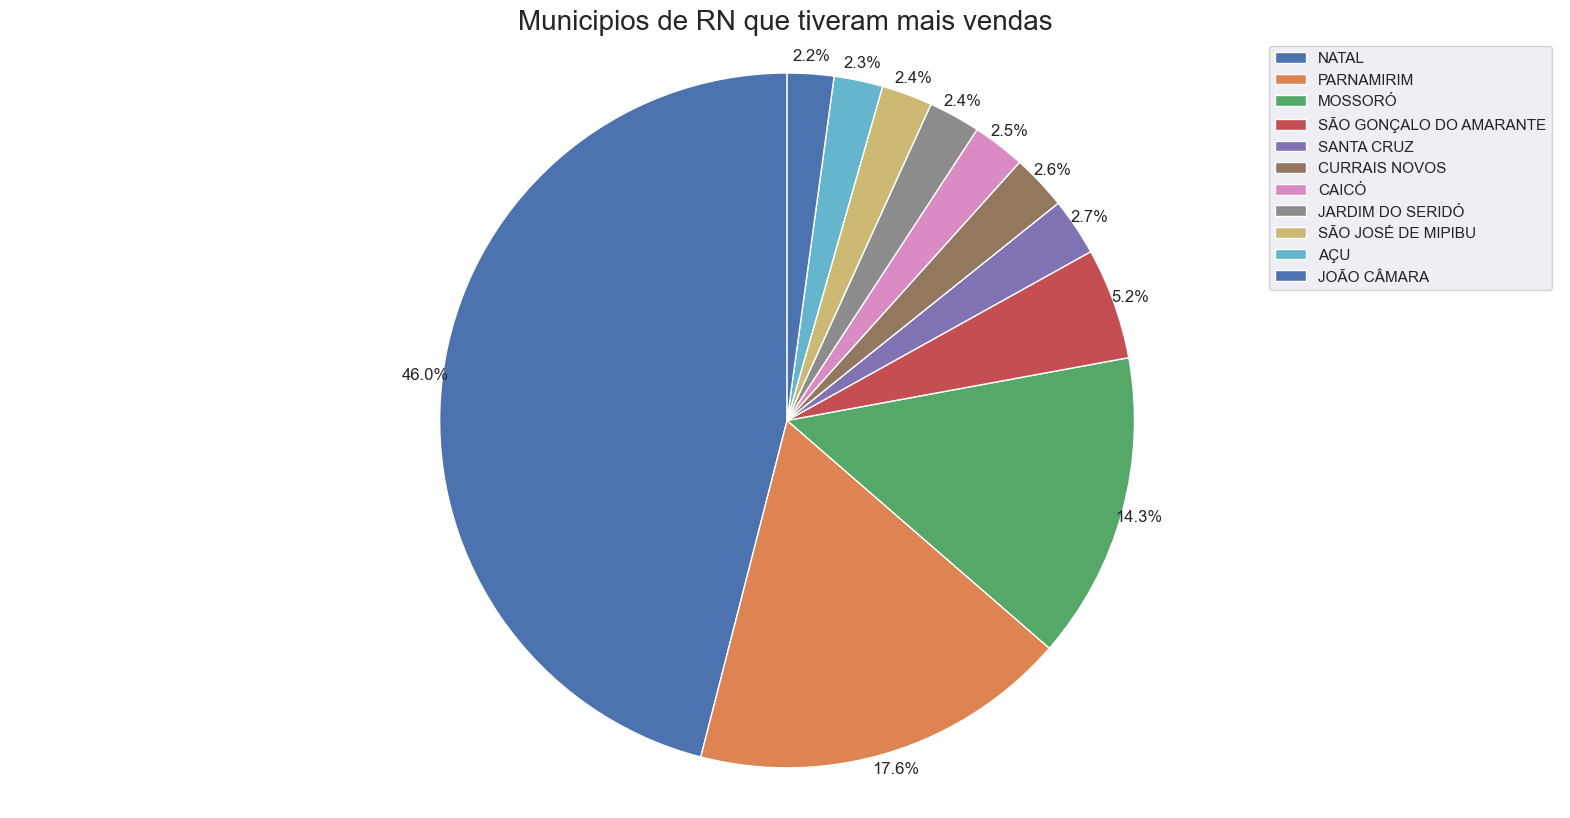

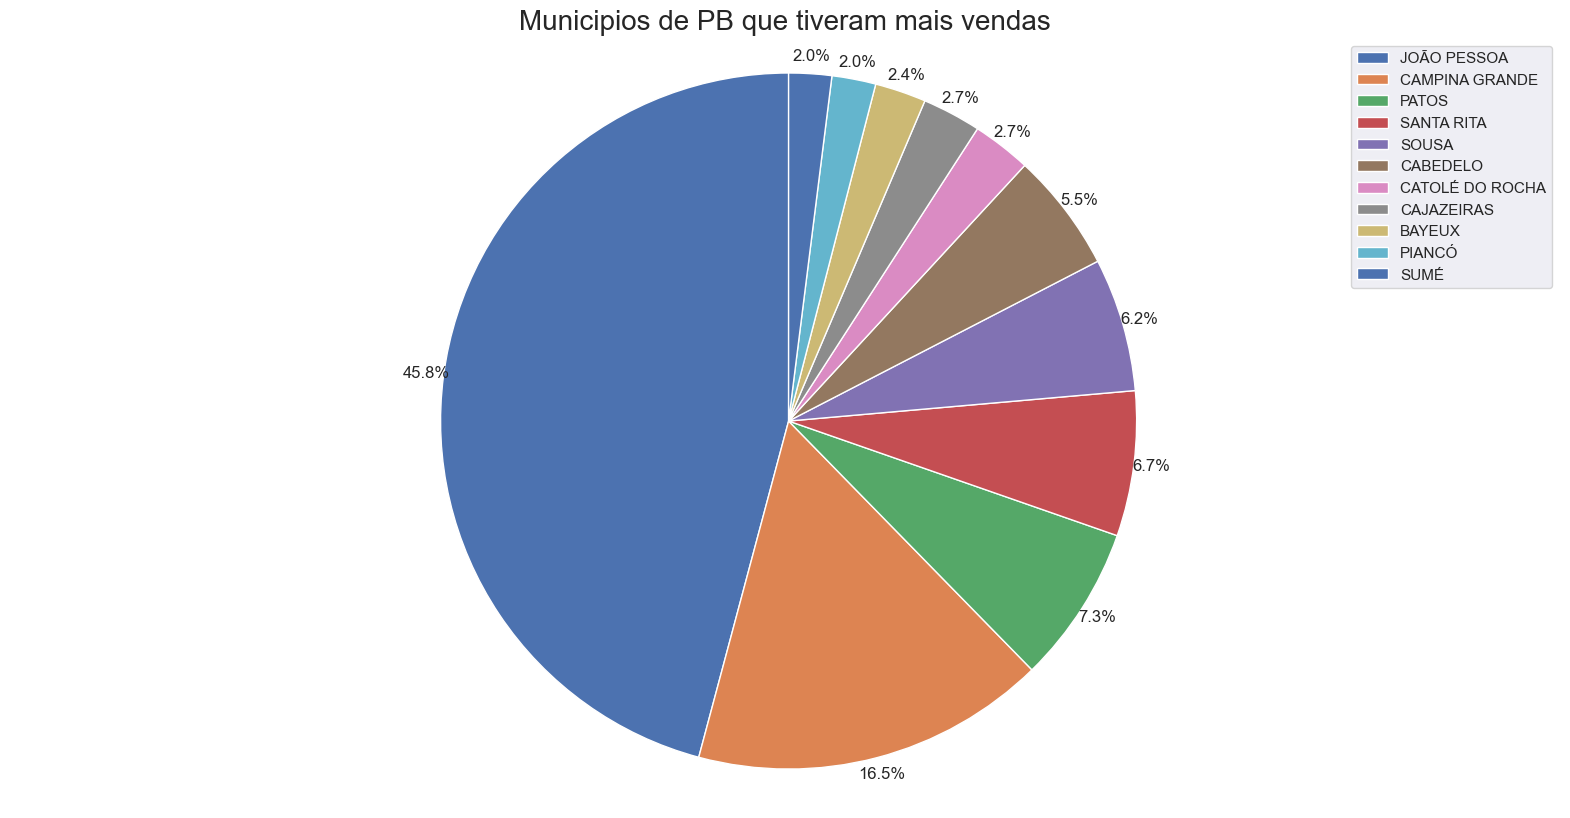

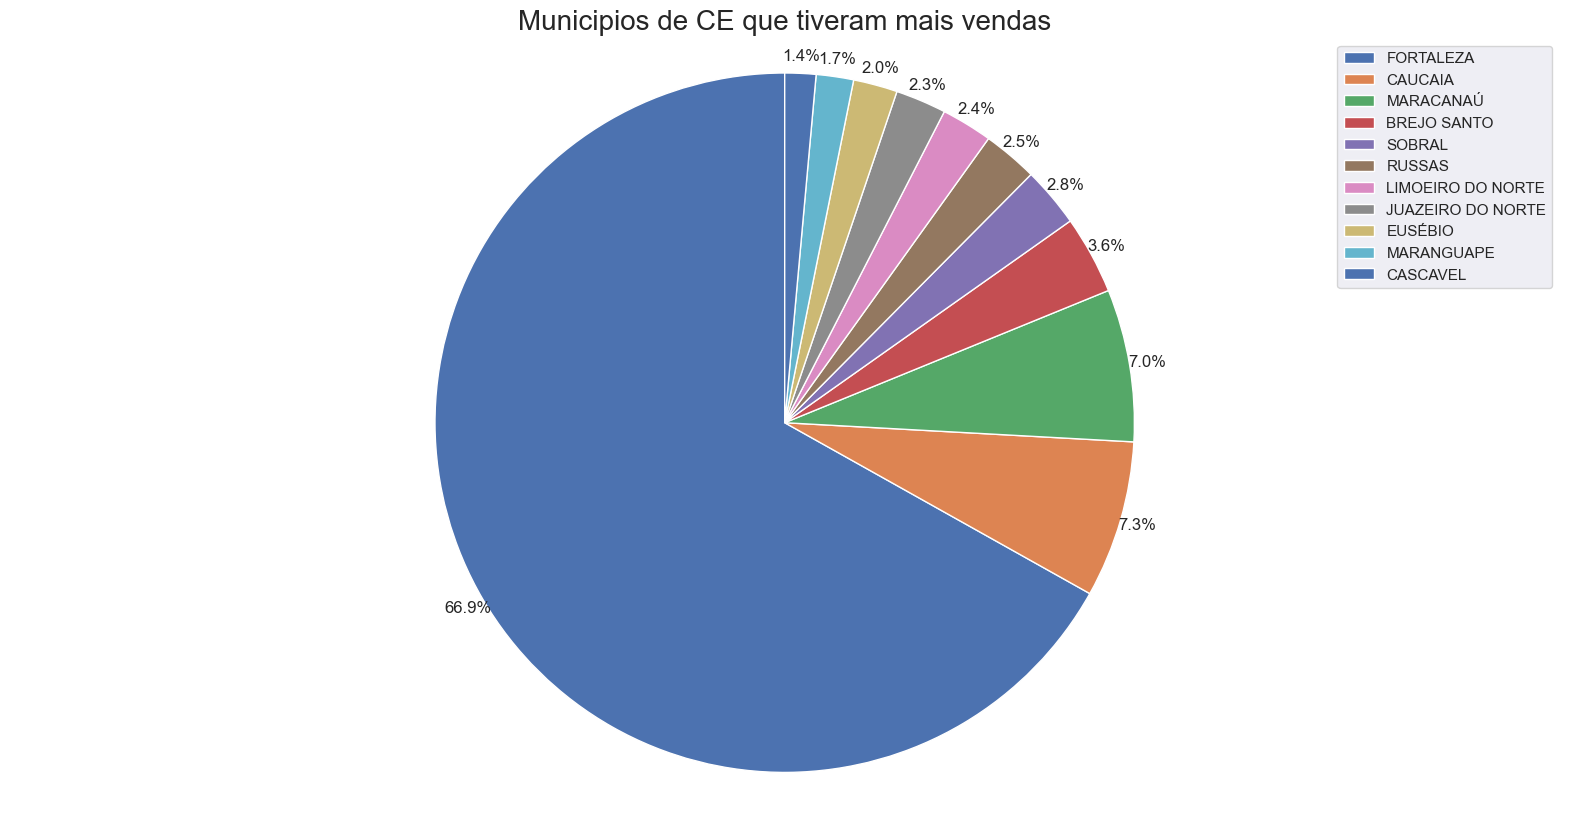

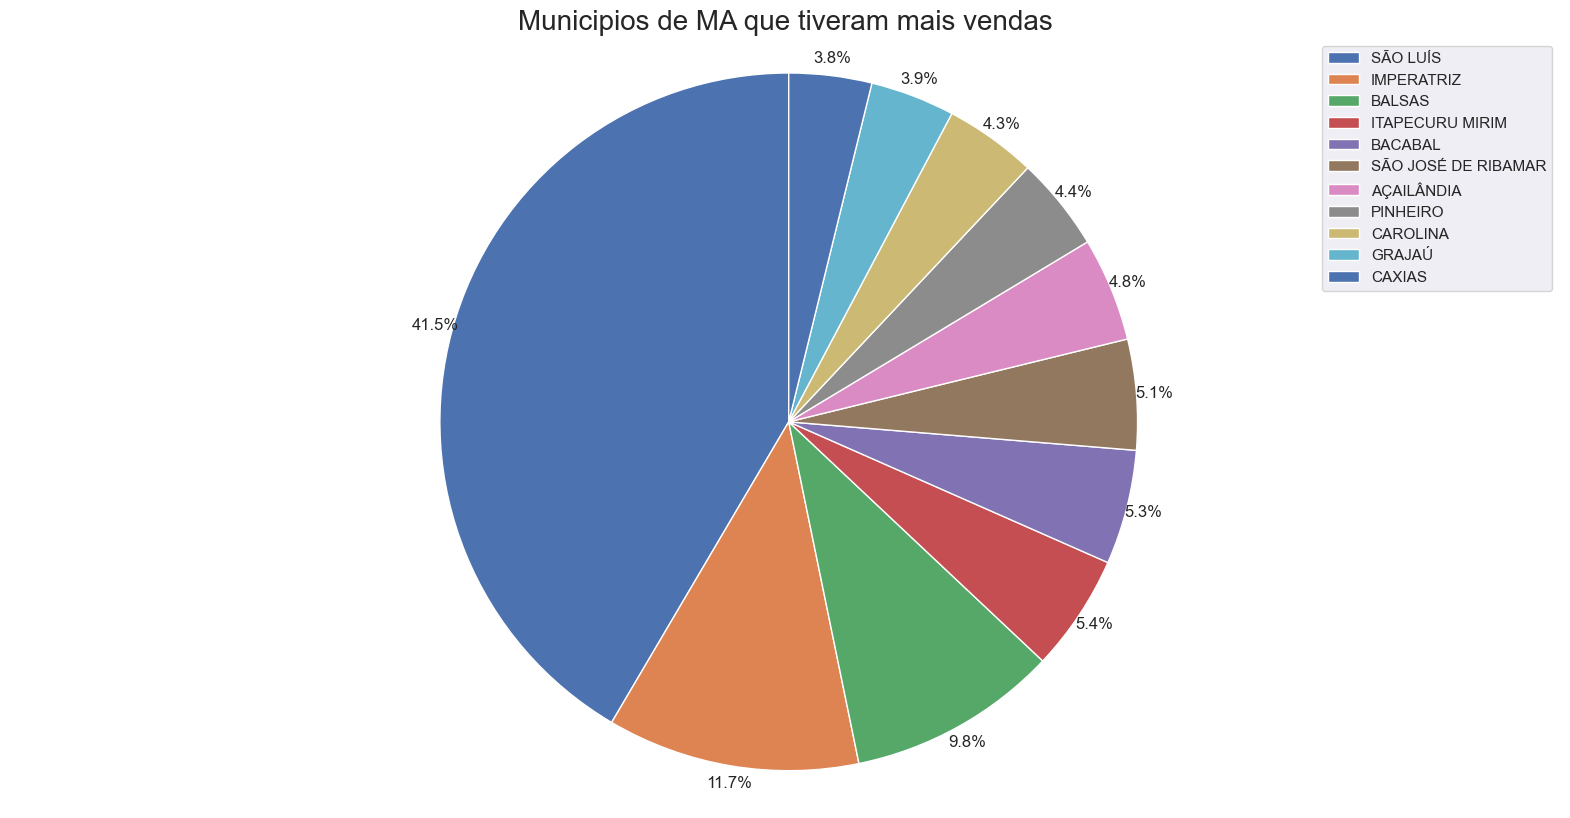

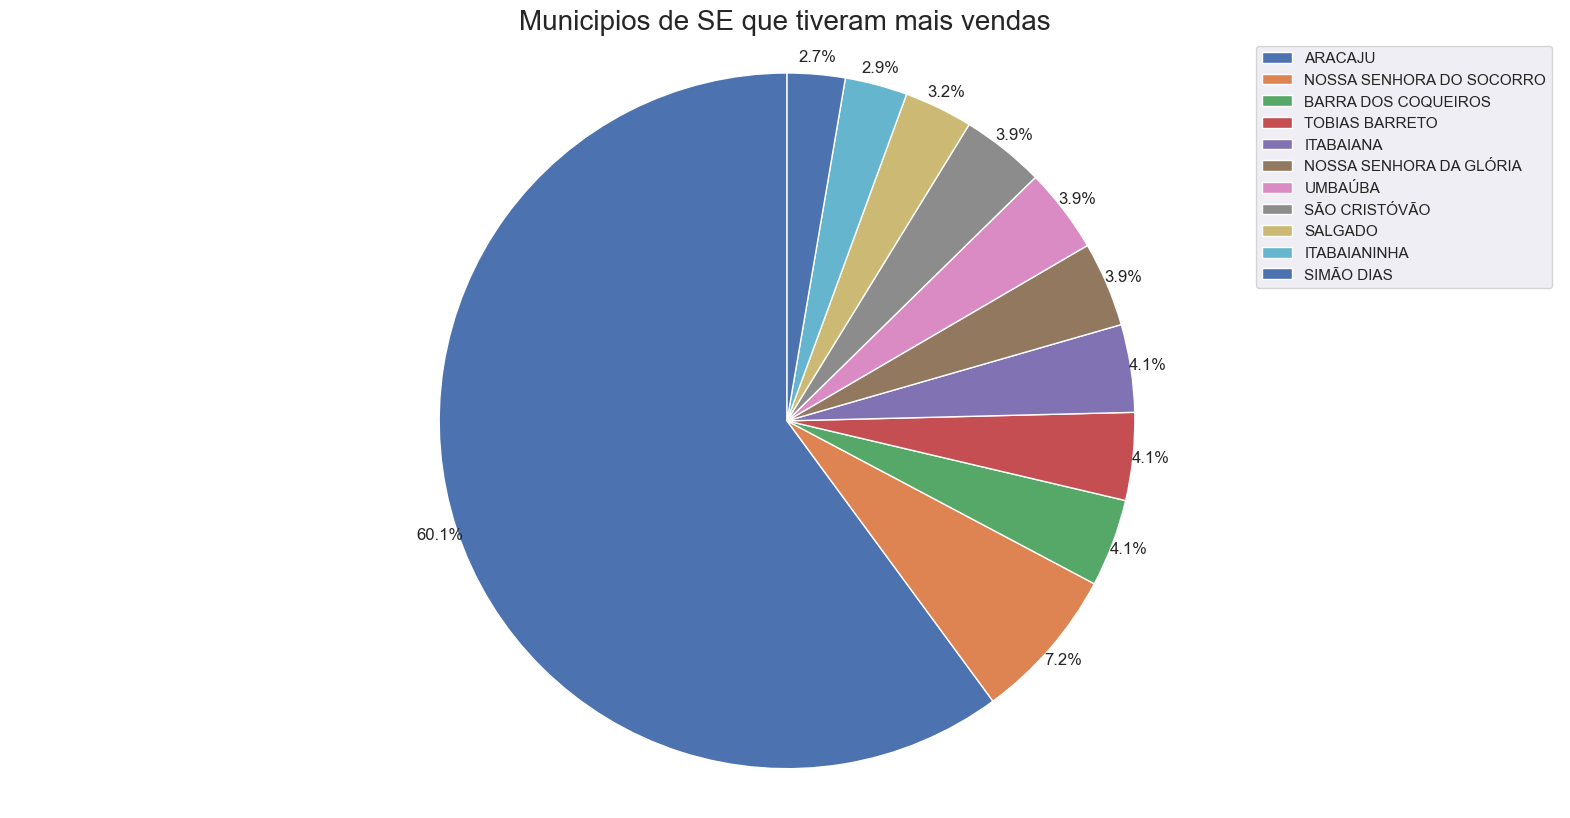

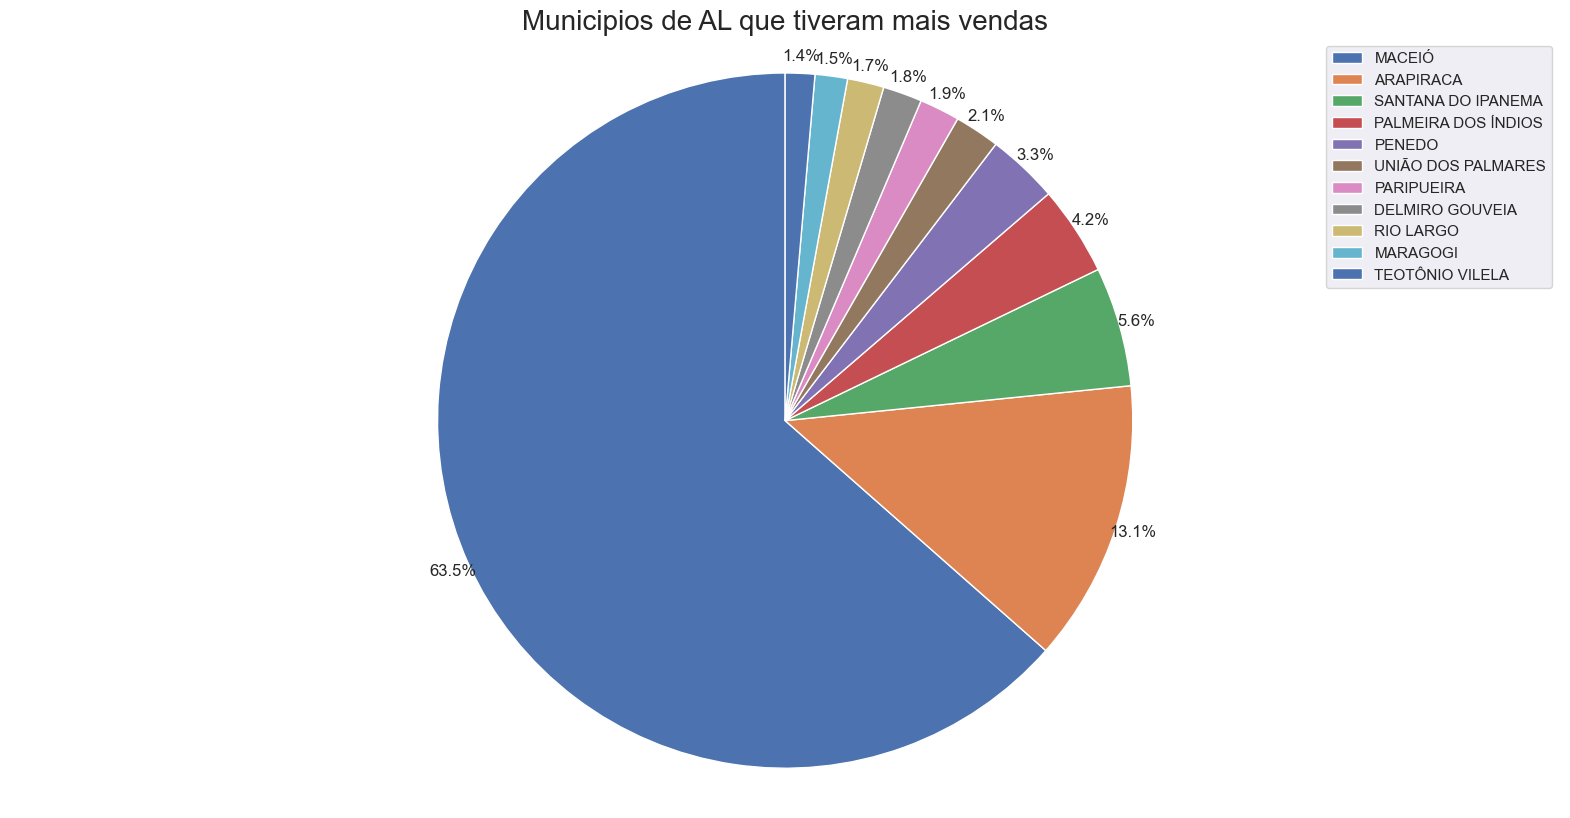

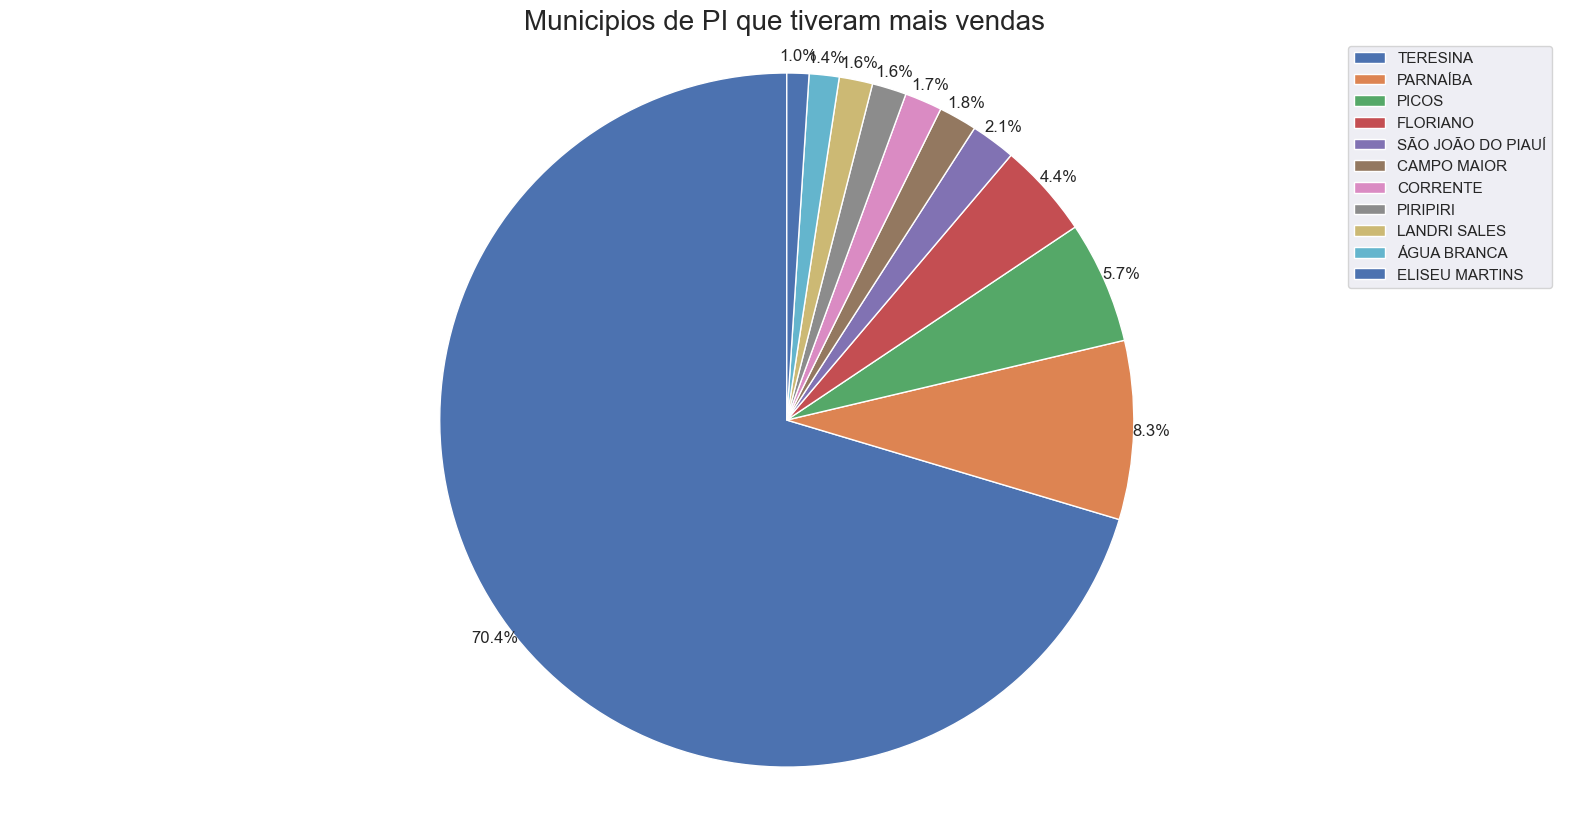

In [28]:
for estado in adultos_atualizado['UF_VENDA'].value_counts().index[0:11]:
    vendeu_mais = adultos_atualizado.query(f'UF_VENDA == "{estado}"')['MUNICIPIO_VENDA'].value_counts()
    
    plt.figure(figsize=(20,10))
    plt.pie(vendeu_mais[0:11], 
            autopct='%1.1f%%',
            pctdistance=1.05,
            startangle=90)  
    plt.title(f'Municipios de {estado} que tiveram mais vendas',
             size=20)
    plt.legend(vendeu_mais.index[0:11], loc='upper right')
    plt.axis('equal')
plt.show()

Como as dez CID10 mais presentes em cada estado se distribuem pelo nordeste?

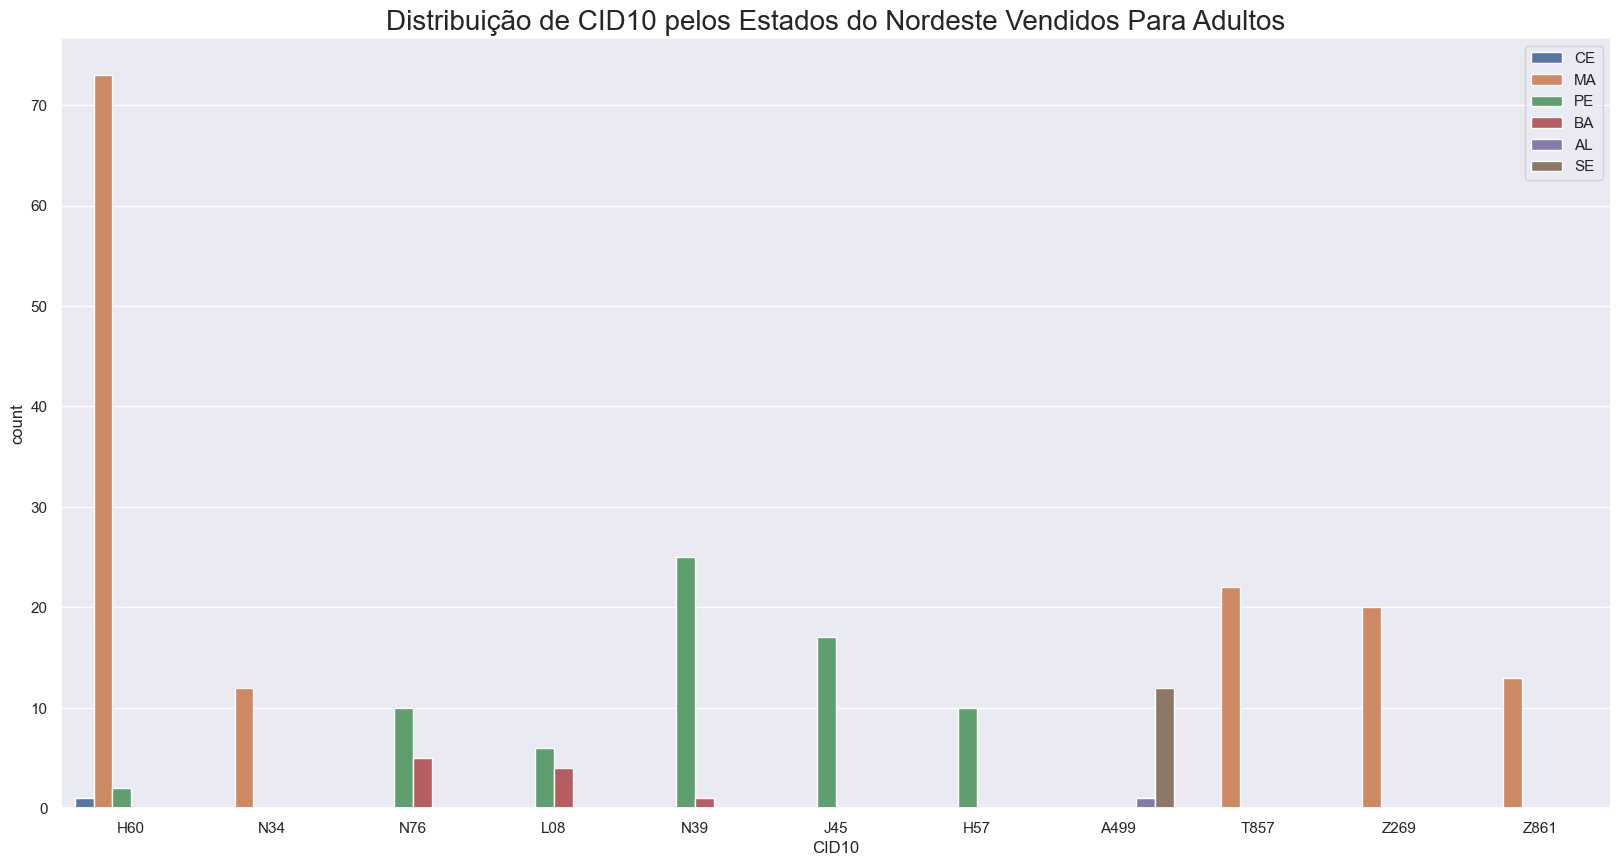

In [37]:
cids10 = adultos_atualizado.query('CID10 != "Não possui"')
cids10_10 = list(cids10['CID10'].value_counts()[0:11].index)
cids10 = cids10.loc[cids10['CID10'].isin(cids10_10),:]

plt.figure(figsize=(20,10))

sns.countplot(x='CID10', hue='UF_VENDA', data=cids10)

plt.title(f'Distribuição de CID10 pelos Estados do Nordeste Vendidos Para Adultos',
             size=20)
plt.legend(loc='upper right')

Quais os Conselhos Regionais de Medicina que mais liberaram receitas?

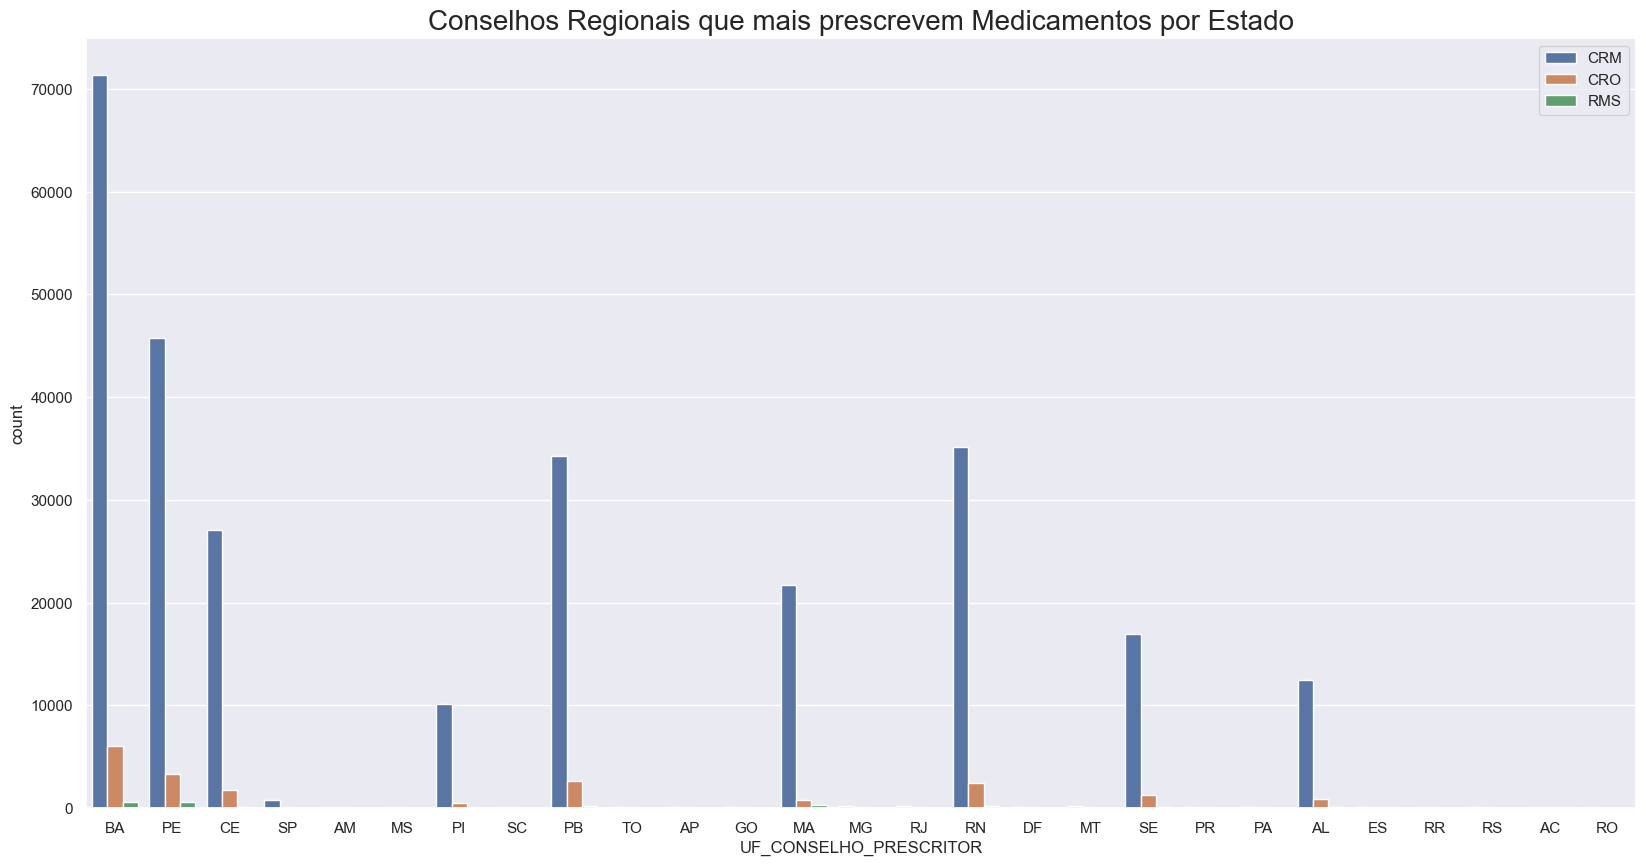

In [64]:
plt.figure(figsize=(20,10))
sns.countplot(x='UF_CONSELHO_PRESCRITOR', hue='CONSELHO_PRESCRITOR', data=adultos_atualizado)
plt.title('Conselhos Regionais que mais prescrevem Medicamentos por Estado',
          size=20)
plt.legend(loc='upper right')

Quais os tipos de receitas mais presentes em cada estado?

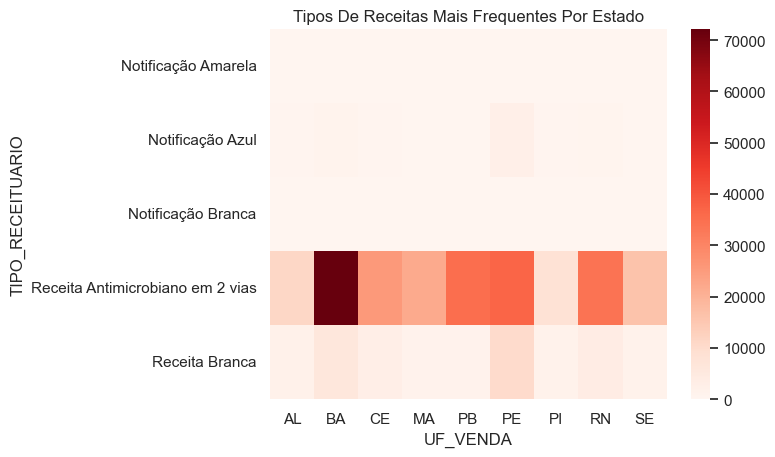

In [81]:
cross_tab = pd.crosstab(adultos_atualizado['TIPO_RECEITUARIO'], adultos_atualizado['UF_VENDA'])
sns.heatmap(cross_tab, cmap='Reds')
plt.title('TIPOS DE RECEITAS MAIS FREQUENTES POR ESTADO'.title())
plt.show()

No nordeste, foi prescrito medicamentos mais para homens ou para mulheres?

Text(0.5, 1.0, 'Receitas Prescritas Para Pacientes Por Sexo')

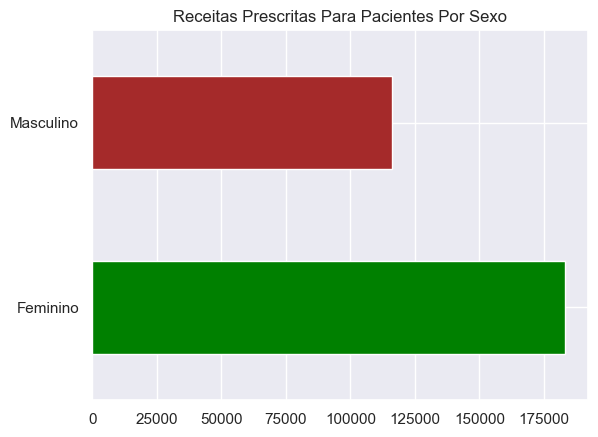

In [92]:
cores = {'Feminino': 'green', 'Masculino': 'brown'}

adultos_atualizado['SEXO'].value_counts().plot(kind='barh', color=cores.values())

plt.title('Receitas prescritas para pacientes por sexo'.title())

# Jovens

Qual o estado do nordeste que teve mais vendas no período de Novembro de 2021?

In [30]:
jovens['UF_VENDA'].value_counts().index[0]

'PE'

Quais os dez medicamentos mais vendidos do nordeste?

[Text(0.5, 1.0, 'Medicamentos mais Vendidos Entre Jovens - Nov/21'),
 Text(0, 0.5, 'Medicamentos')]

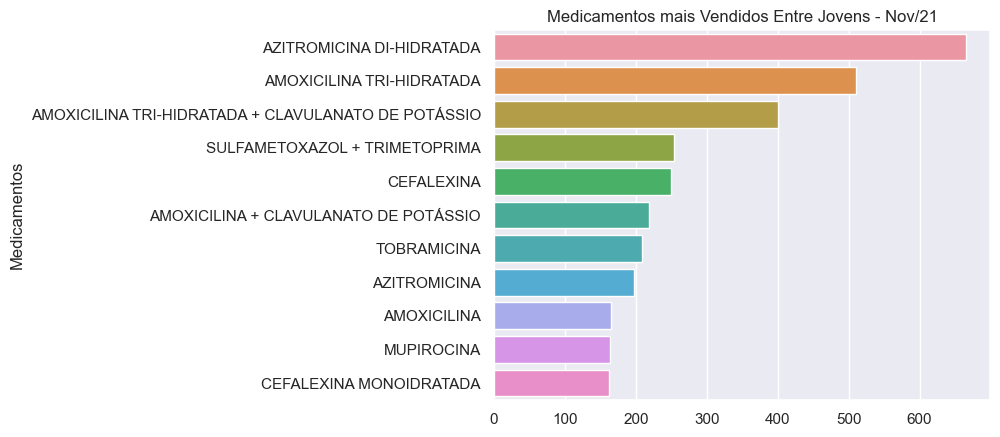

In [31]:
top_dez_med_jovens = sns.barplot(x=jovens['PRINCIPIO_ATIVO'].value_counts().values[0:11],
                                 y=jovens['PRINCIPIO_ATIVO'].value_counts().index[0:11],
                                orient='h')
top_dez_med_jovens.set(title='Medicamentos mais Vendidos Entre Jovens - Nov/21', 
                       ylabel='Medicamentos')

Qual o medicamento mais vendido em cada estado?

In [32]:
for estado in jovens['UF_VENDA'].value_counts().index:
    medicamento = jovens.query(f'UF_VENDA == "{estado}"')['PRINCIPIO_ATIVO']
    print(estado,medicamento.value_counts().index[0],medicamento.value_counts().max(), sep=' | ')

PE | CLONAZEPAM | 111
BA | AZITROMICINA DI-HIDRATADA | 148
CE | AZITROMICINA DI-HIDRATADA | 113
MA | AZITROMICINA DI-HIDRATADA | 75
RN | AZITROMICINA DI-HIDRATADA | 110
PB | AMOXICILINA TRI-HIDRATADA | 76
SE | AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO | 38
AL | AZITROMICINA DI-HIDRATADA | 17
PI | AZITROMICINA DI-HIDRATADA | 29


Quais os municípios em cada estado do nordeste que teve mais vendas?

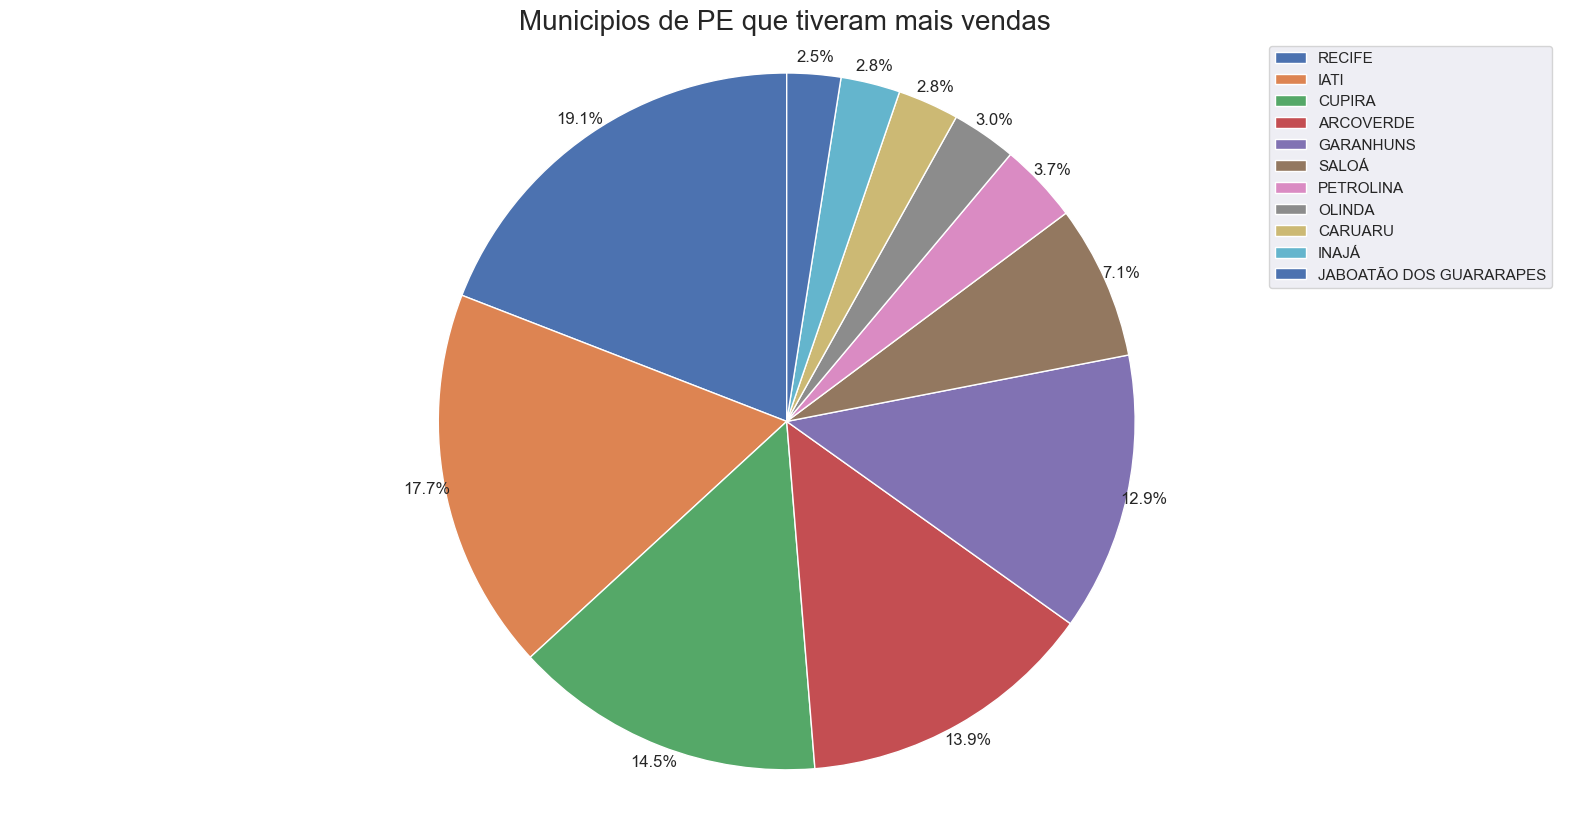

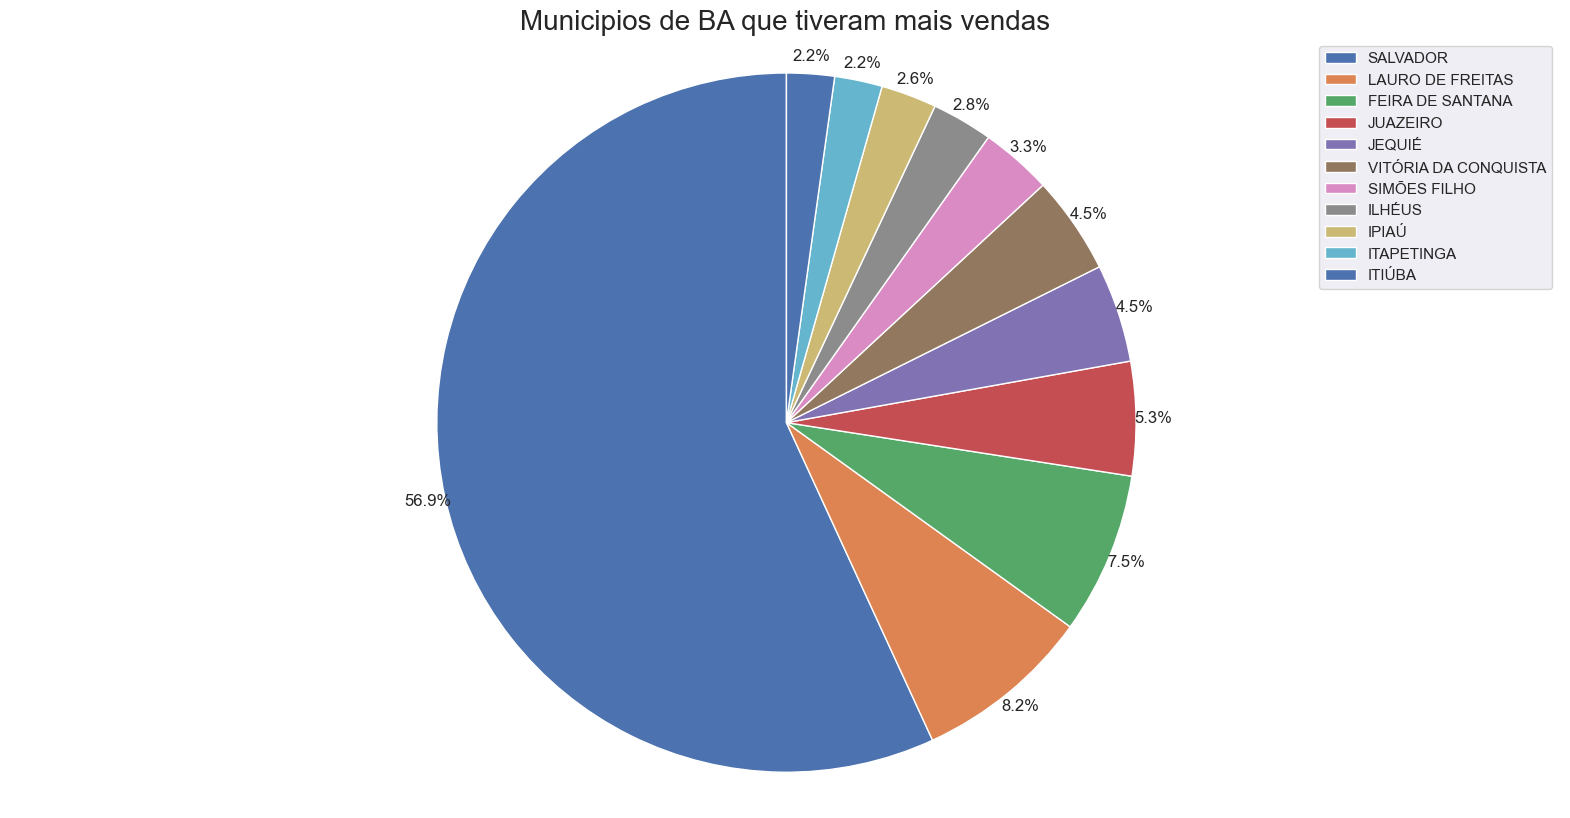

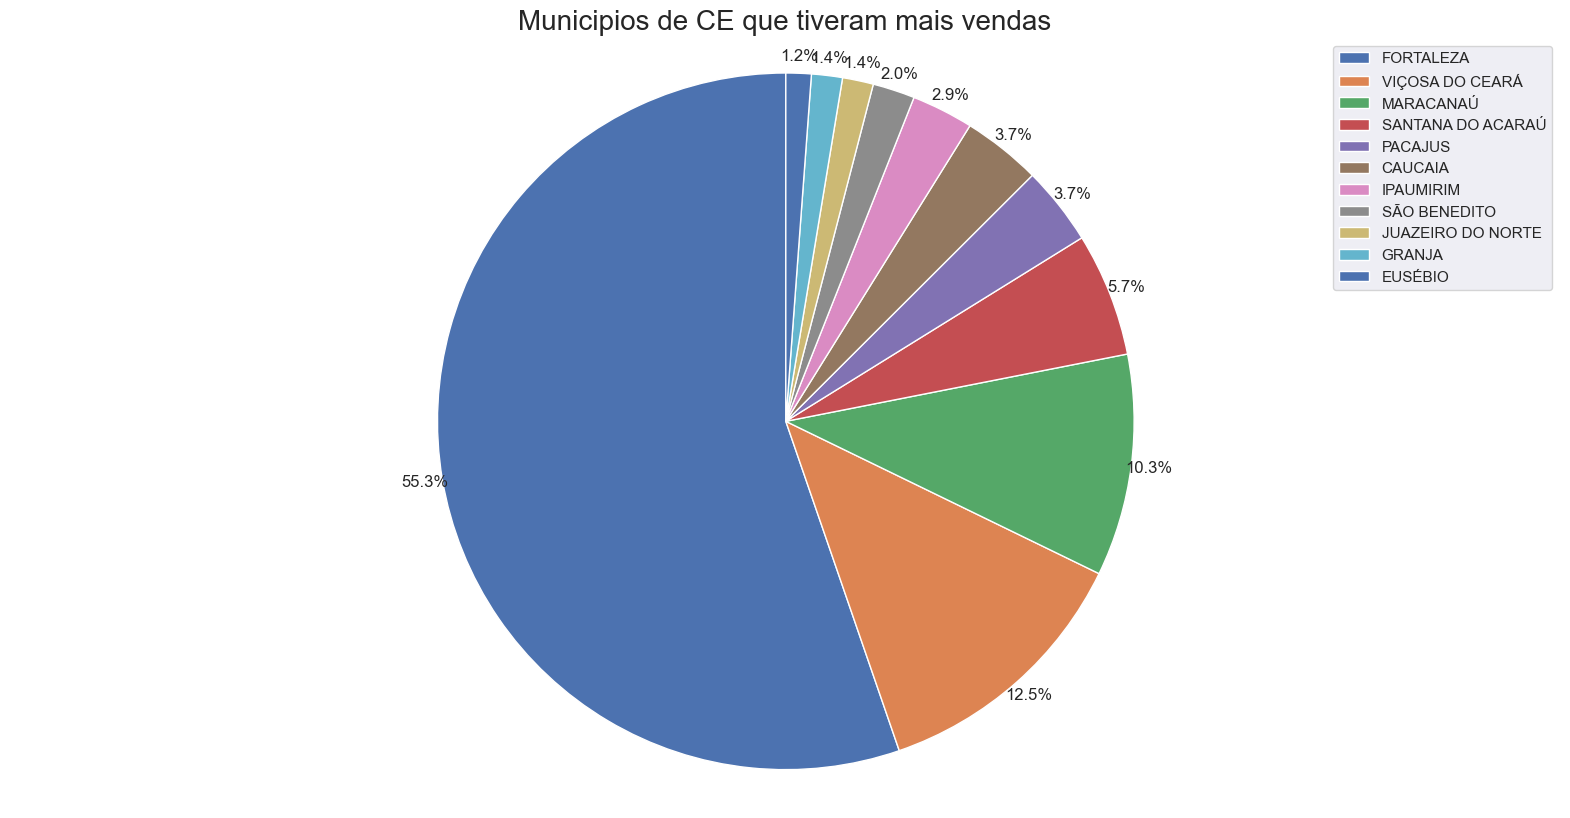

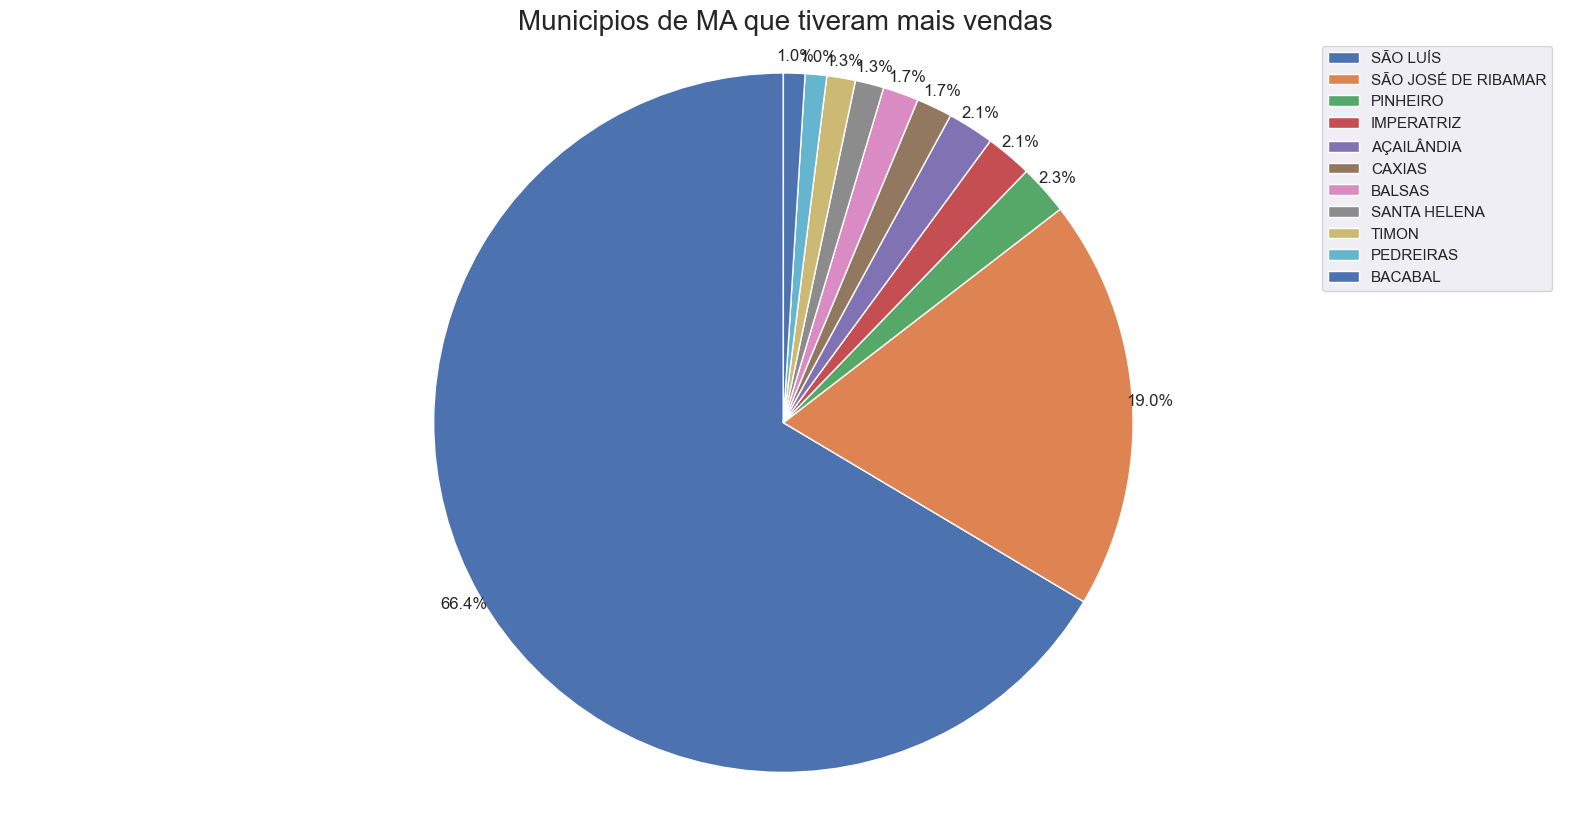

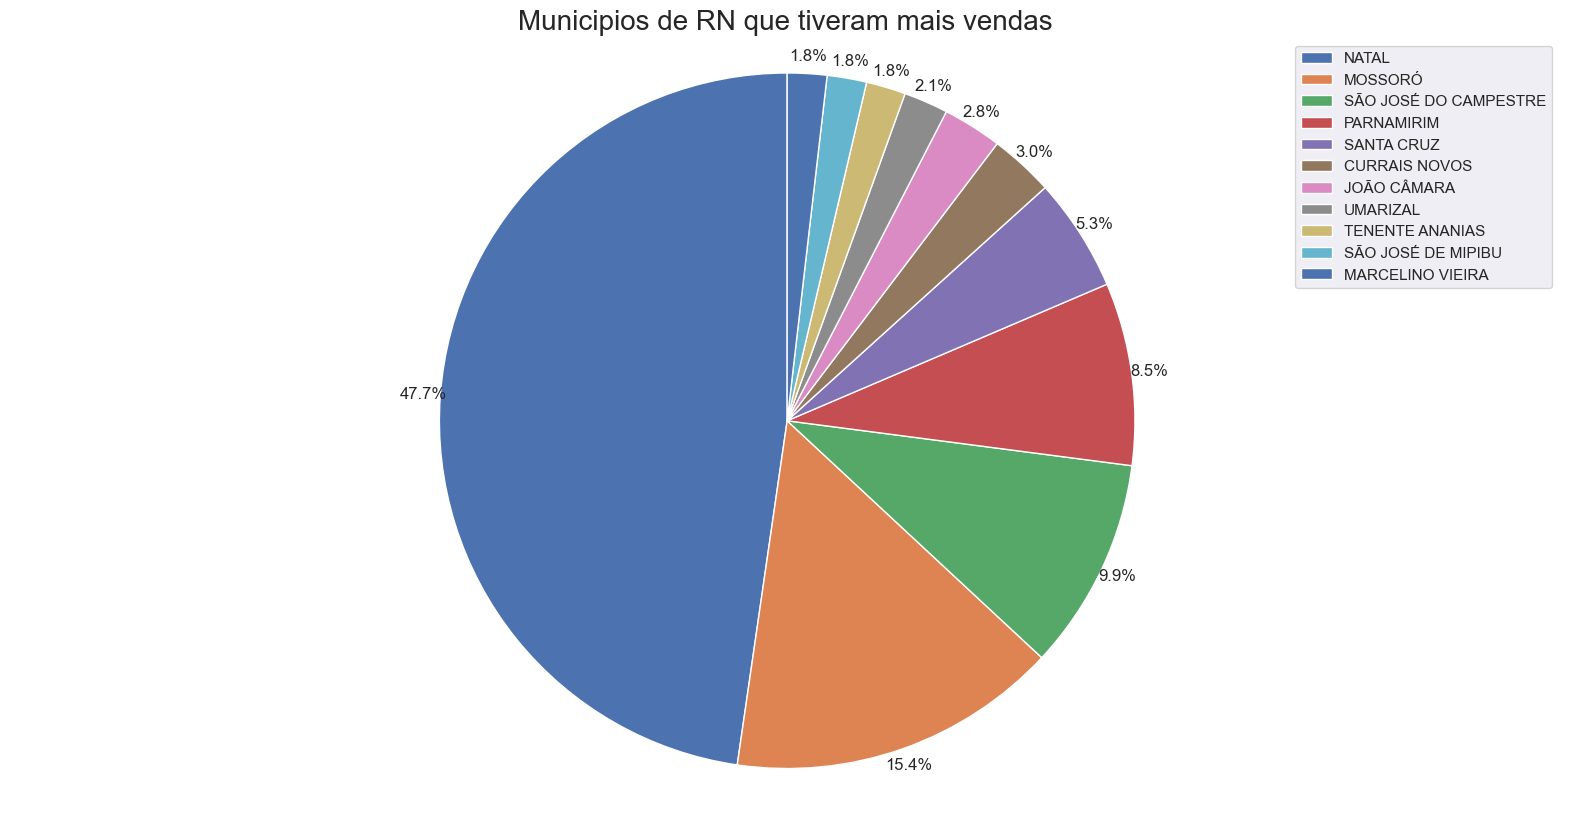

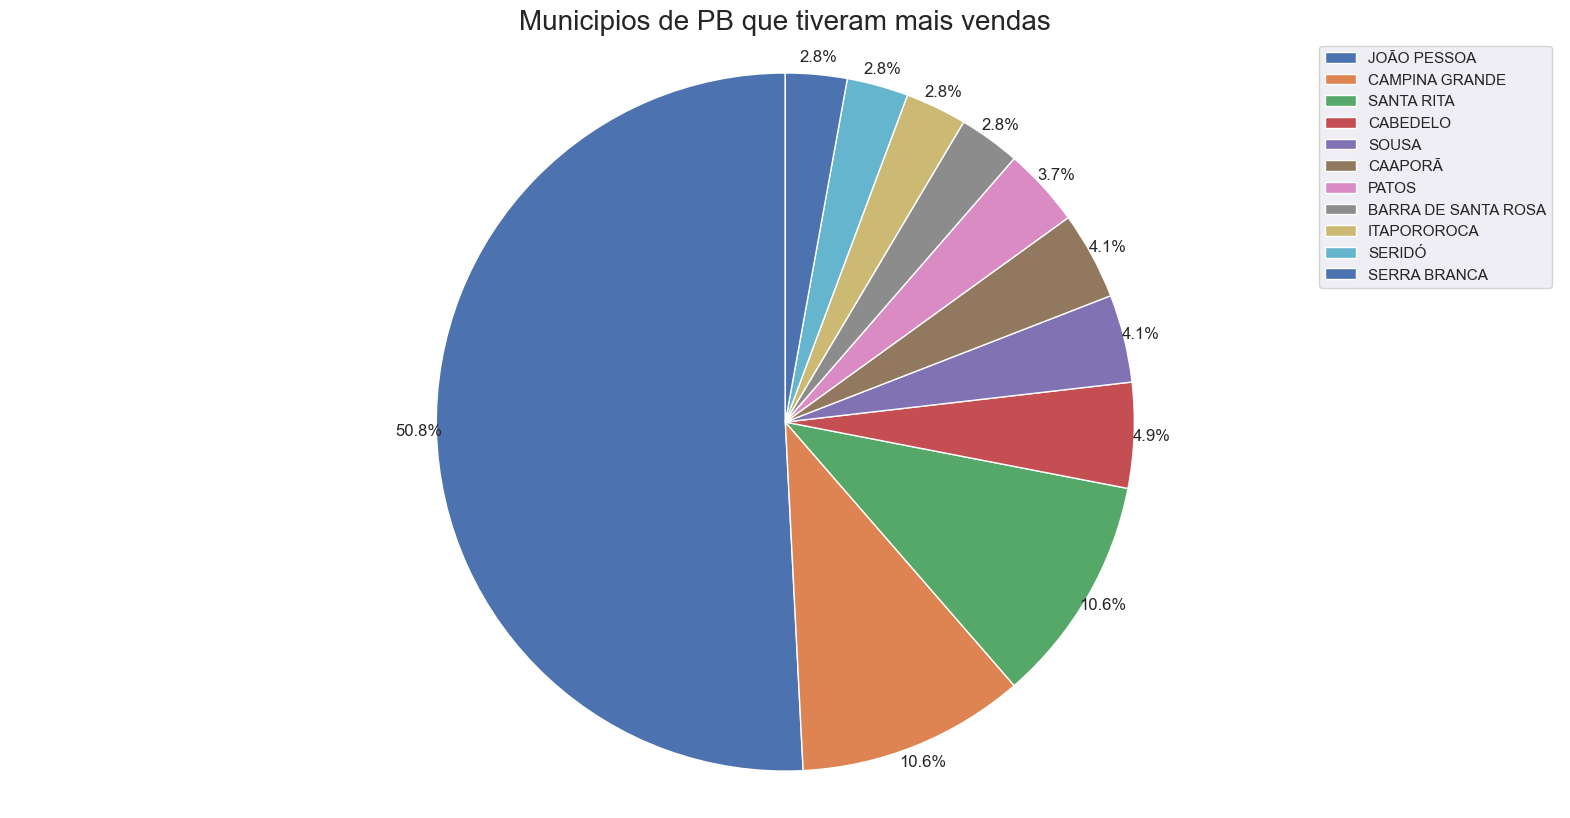

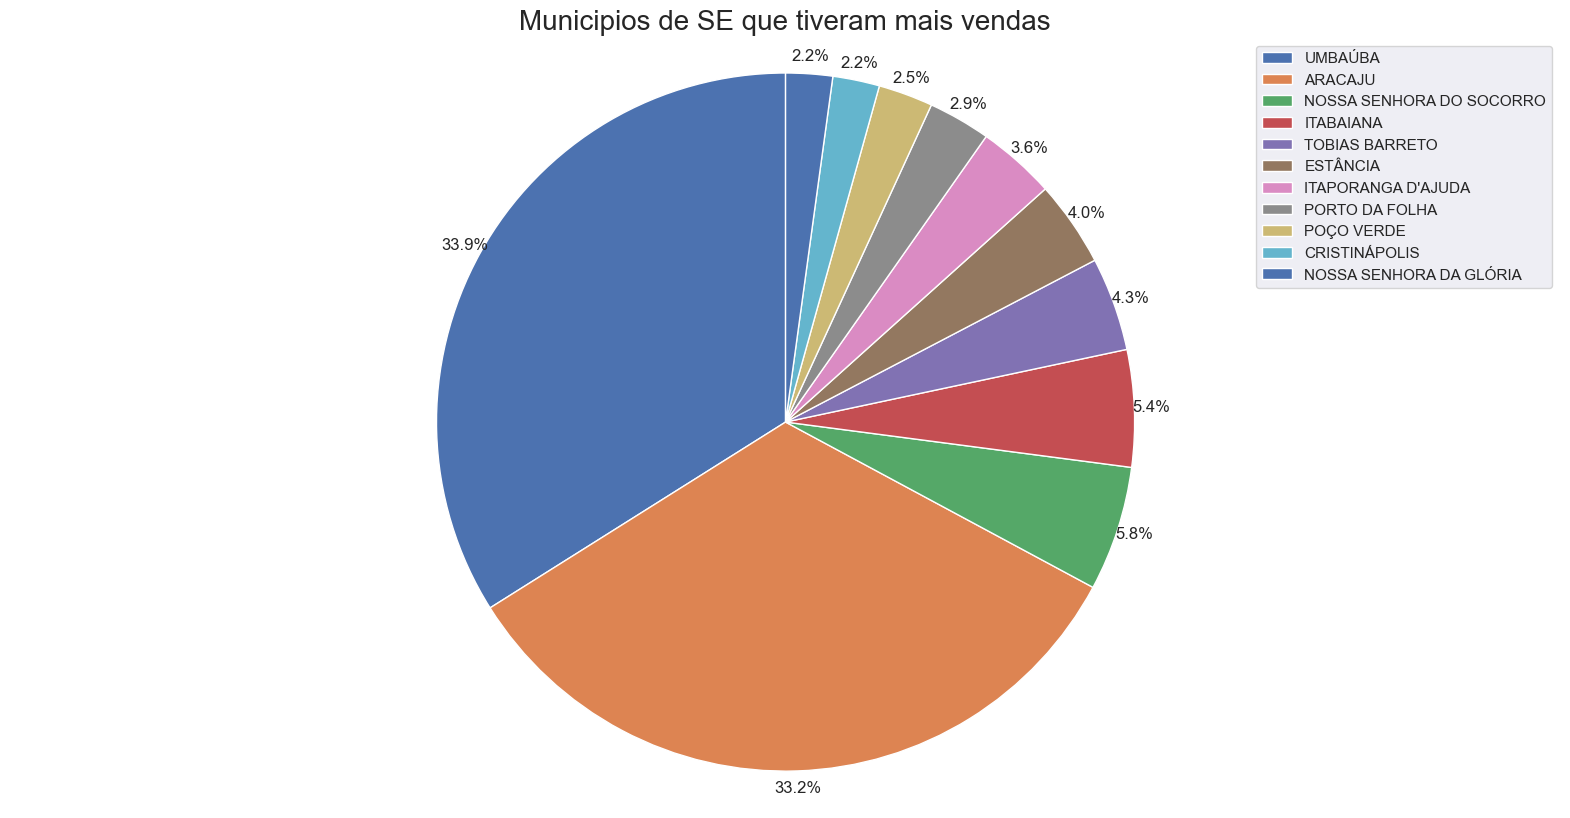

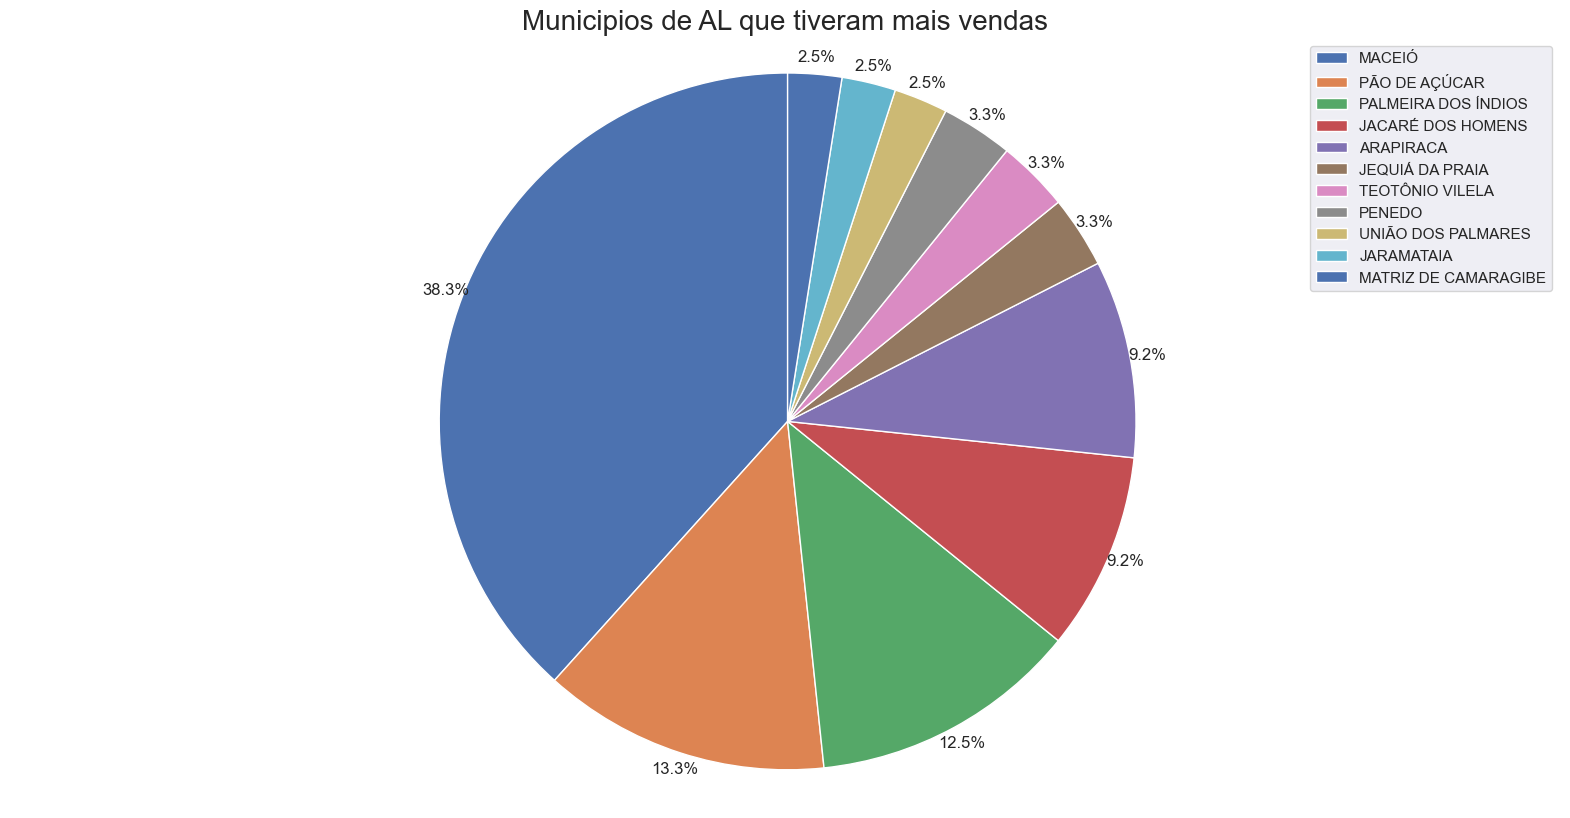

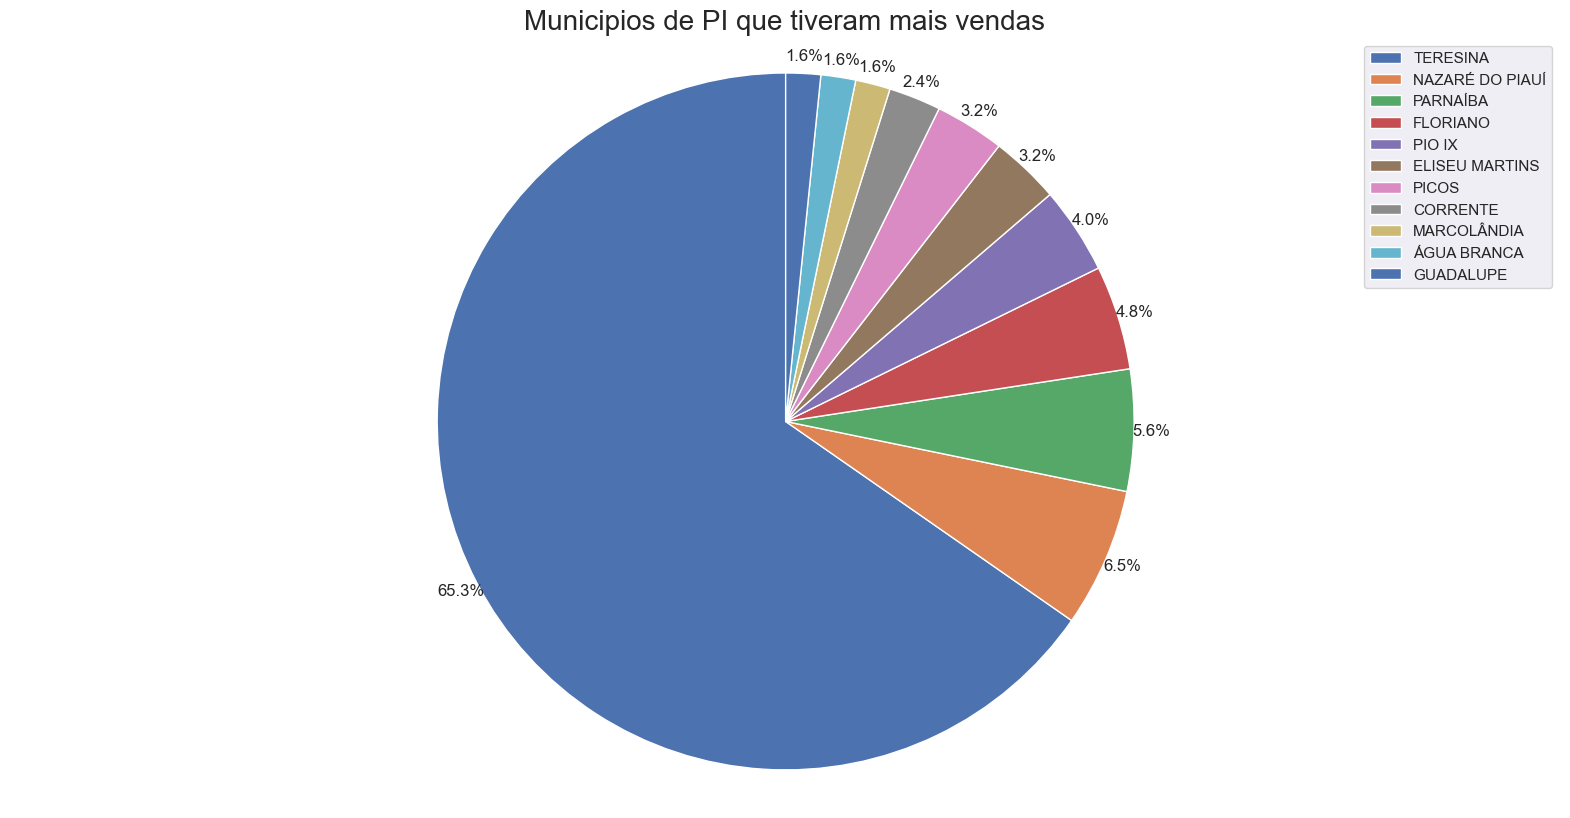

In [33]:
for estado in jovens['UF_VENDA'].value_counts().index[0:11]:
    vendeu_mais = jovens.query(f'UF_VENDA == "{estado}"')['MUNICIPIO_VENDA'].value_counts()
    
    plt.figure(figsize=(20,10))
    plt.pie(vendeu_mais[0:11], 
            autopct='%1.1f%%',
            pctdistance=1.05,
            startangle=90)  
    plt.title(f'Municipios de {estado} que tiveram mais vendas',
             size=20)
    plt.legend(vendeu_mais.index[0:11], loc='upper right')
    plt.axis('equal')
plt.show()

Como as dez CID10 mais presentes em cada estado se distribuem pelo nordeste?

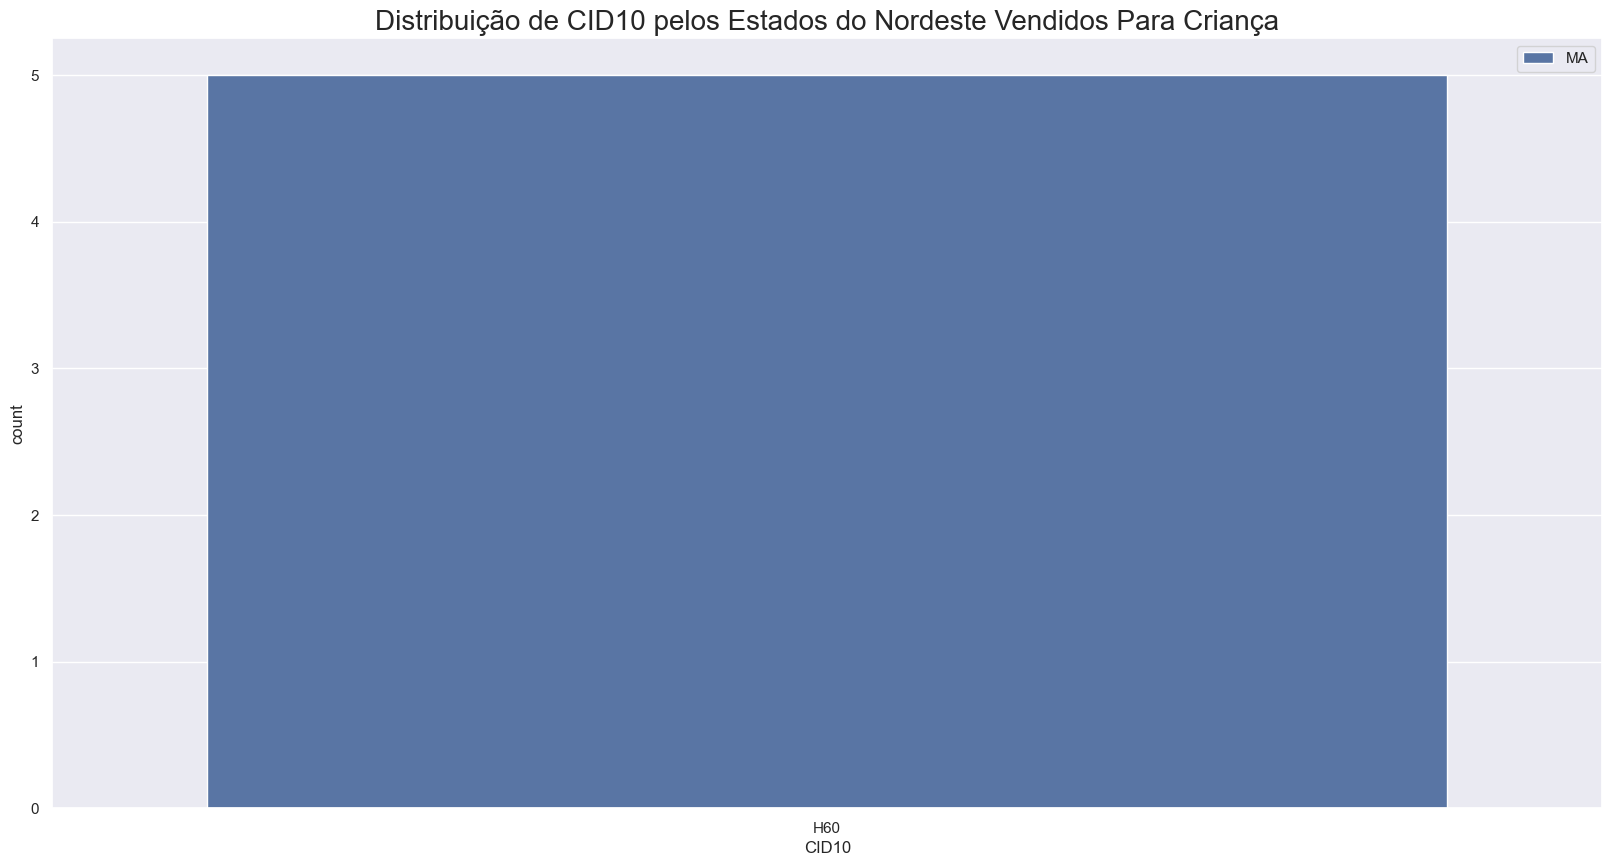

In [40]:
cids10 = jovens.query('CID10 != "Não possui"')
cids10_10 = list(cids10['CID10'].value_counts().index)
cids10 = cids10.loc[cids10['CID10'].isin(cids10_10),:]

plt.figure(figsize=(20,10))

sns.countplot(x='CID10', hue='UF_VENDA', data=cids10)

plt.title(f'Distribuição de CID10 pelos Estados do Nordeste Vendidos Para Criança',
             size=20)
plt.legend(loc='upper right')

Quais os Conselhos Regionais de Medicina que mais liberaram receitas?

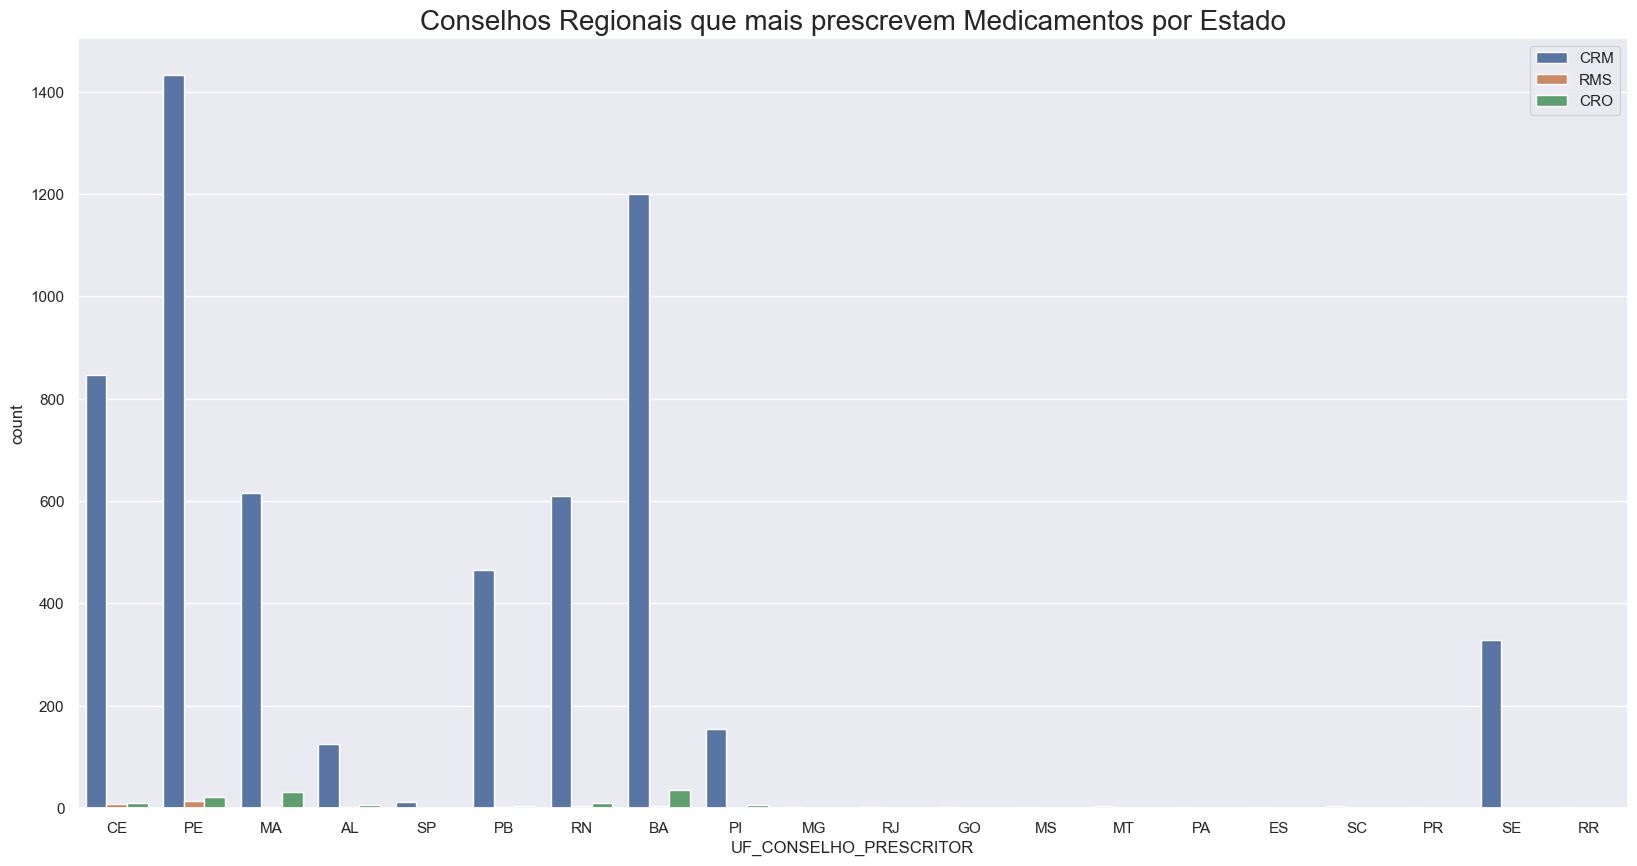

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(x='UF_CONSELHO_PRESCRITOR', hue='CONSELHO_PRESCRITOR', data=jovens)
plt.title('Conselhos Regionais que mais prescrevem Medicamentos por Estado',
          size=20)
plt.legend(loc='upper right')

Quais os tipos de receitas mais presentes em cada estado?

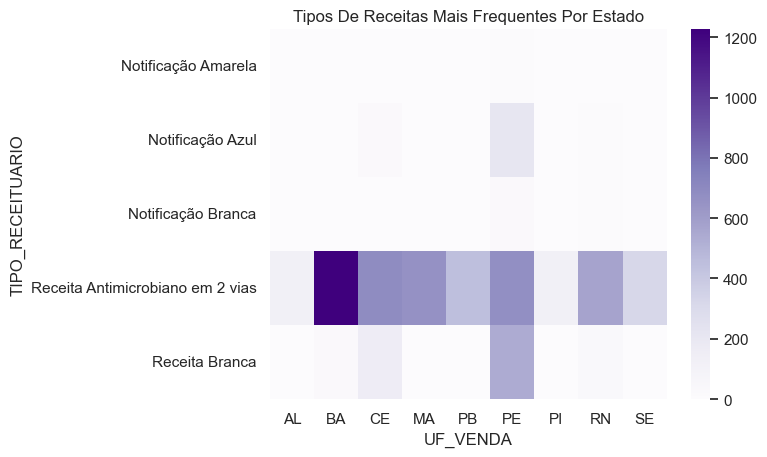

In [83]:
cross_tab = pd.crosstab(jovens['TIPO_RECEITUARIO'], jovens['UF_VENDA'])
sns.heatmap(cross_tab, cmap='Purples')
plt.title('TIPOS DE RECEITAS MAIS FREQUENTES POR ESTADO'.title())
plt.show()

No nordeste, foi prescrito medicamentos mais para homens ou para mulheres?

Text(0.5, 1.0, 'Receitas Prescritas Para Pacientes Por Sexo')

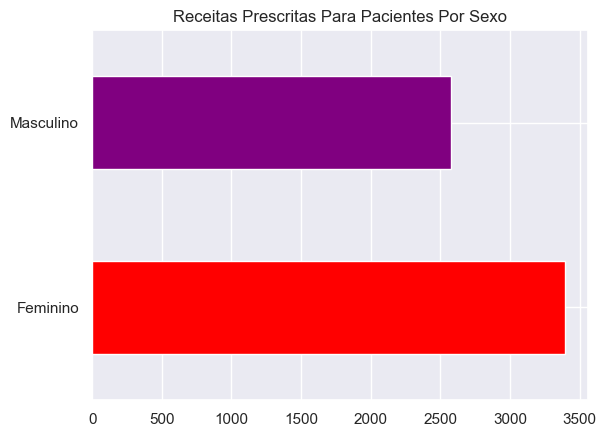

In [96]:
cores = {'Feminino': 'red', 'Masculino': 'purple'}

jovens['SEXO'].value_counts().plot(kind='barh', color=cores.values())

plt.title('Receitas prescritas para pacientes por sexo'.title())

# Conclusão

Depois de todos os tratamentos de dados, a análise descritiva baseada nas perguntas feitas ao explorar os dados foram  executadas com sucesso. Todas as análises foram feitas tanto para o filtro de adultos quanto para o filtro de jovens para todos os estados do Nordeste brasileiro. Os insights apresentados com os gráficos foram intrigantes, apesar de ser apenas um recorte do registro de vendas dos medicamentos  antimicrobianos no Brasil, ao executar análise gráfica podemos tirar conclusões do comportamento de compra e prescrição médica desses  produtos farmacêuticos de acordo com as idades.

Os resultados obtidos para cada pergunta serão dispostos nesta conclusão de acordo com a divisão proposta na análise.

## Adultos
Para os medicamentos prescritos no período de novembro de 2021 o estado que teve mais vendas de medicamentos registrados foi a Bahia e é perceptível que os 10 medicamentos mais vendidos do Nordeste se enquadram na classe terapêutica de antibióticos, Sendo mais presente  amoxicilina O que pode indicar Que nesse período de novembro a população poderia estar passando por problemas infecciosos causados por bactérias, Com tudo quando vamos analisar qual o medicamento mais vendido em cada estado do Nordeste se encontra em primeiro lugar Azitromicina di-hidratada.
Para entender melhor  a distribuição de venda de medicamentos dentro de cada estado foi analisado Quais os municípios que mais Venderam dentro de cada estado sendo eles em ordem Salvador, Recife, Natal, João Pessoa, São Luís, Aracaju, Maceió e Teresina. Entretanto, é esperado que o maior número de vendas seja nas capitais dos estados do Nordeste.E quando pensamos em quais doenças eram mais presentes em cada estado alguns dessas localidades  sofreram algum tipo de subnotificação Mas conseguimos tirar uma conclusão das  Doenças através da classificação internacional de doenças e problemas relacionados à saúde (CID10).

<h5>Tabela de CIDs</h5>

<table>
        <tr>
            <th>CID</th>
            <th>Descrição</th>
        </tr>
        <tr>
            <td>H60</td>
            <td>Otite Externa</td>
        </tr>
        <tr>
            <td>N34</td>
            <td>Uretrite e Síndrome Uretral</td>
        </tr>
        <tr>
            <td>N76</td>
            <td>Outras Afecções Inflamatórias da Vagina e da Vulva</td>
        </tr>
        <tr>
            <td>L08</td>
            <td>Outras Infecções Localizadas da Pele e do Tecido Subcutâneo</td>
        </tr>
        <tr>
            <td>N39</td>
            <td>Outros Transtornos do Trato Urinário</td>
        </tr>
        <tr>
            <td>J45</td>
            <td>Asma</td>
        </tr>
        <tr>
            <td>H57</td>
            <td>Outros Transtornos do Olho e Anexos</td>
        </tr>
        <tr>
            <td>A499</td>
            <td>Infecção Bacteriana não Especificada</td>
        </tr>
        <tr>
            <td>T857</td>
            <td>Infecção e Reação Inflamatória devida a outros Dispositivos Protéticos, Implantes e Enxertos Internos</td>
        </tr>
        <tr>
            <td>Z269</td>
            <td>Necessidade de Imunização contra Doença Infecciosa não Especificada</td>
        </tr>
        <tr>
            <td>Z861</td>
            <td>História Pessoal de Doenças Infecciosas e Parasitárias</td>
        </tr>
</table>

Em seguida foi levantado o questionamento de quais os conselhos regionais liberaram mais receitas e como esperado o Conselho Regional de Medicina de quase todos os estados do Nordeste foram predominantes na contagem de prescrições outra pergunta a partir deste ponto é feita em relação aos tipos de receituários e foi percebido que a maior parte de receituários desses medicamentos são de receita antimicrobiana em duas vias e por fim Foi notado que entre os adultos esses tipos de doenças são mais predominantes e vendidos para mulheres.

## Jovens
As mesmas perguntas e direcionamento de pesquisa foram feitos para os recortes de jovens para os estados do Nordeste Foi notado o mesmo padrão para qual tipo de medicamento é mais vendido  essa faixa etária o estado que mais teve vendas em novembro de 2021 foi Pernambuco.
Um fato interessante descoberto nessa base de dados de novembro de 2021 é que em Pernambuco o medicamento mais vendido no estado foi o clonazepam, o que faz pensar qual o tipo de condição médica para  recém-nascidos  a criança já até 12 anos? Analisando os municípios que mais tiveram vendas de medicamentos em novembro de 2021 para crianças foi  respectivamente Recife Salvador Fortaleza São Luís Natal João Pessoa Umbaúba Teresina e Maceió. A única diferença entre os municípios que mais venderam de jovens para adultos é que em Sergipe Aracaju não foi  a cidade que mais teve compra de medicamentos.
Uma surpresa ocorreu quando foi analisado quais seriam  as 10 doenças mais comuns entre os jovens, sendo que a mais comum foi a Otite externa representada pelo CID H60. Como conexão a próxima pergunta é quais conselhos regionais que mais liberaram receitas e predominantemente como esperado foi o Conselho Regional de Medicina e o mesmo padrão foi percebido para tipos de receitas Mais presentes em cada estado que foi adiante microbianos em duas vias Além disso também as receitas Prescritas em novembro de 2021 foram mais para crianças do sexo feminino.

## Em conclusão...
...a experiência de analisar o registro de medicamentos vendidos foi interessante para entender o perfil de distribuição dos medicamentos e entender Quais são as  as doenças mais comuns que afetam os brasileiros o que faz pensar qual seria o padrão de busca de medicamentos em 2023 contudo devido à falta de informações nesse mesmo  escopo para o ano vigente. dessa forma ações podem ser tomadas para entender  monitorar o uso racional de medicamento no Brasil tanto para adulto quanto para jovens. 